In [1]:

import pandas as pd 

In [3]:
df = pd.read_csv(r"C:\Users\User\Desktop\ÌîÑÎ°úÏ†ùÌä∏\Í∞úÏù∏\instacart_feedback\ÎØºÏßÄ\instacart_rvw_all_trans.csv")

In [4]:

df.rename(columns={'Î¶¨Î∑∞(Î≤àÏó≠)': 'Î¶¨Î∑∞'}, inplace=True)

In [5]:
df.head(3)

rating                                             review  \
0       1  The two times I have ordered and had my delive...   
1       1  I have ordered 6 times using Instacart and 4 o...   
2       1  8 times out of 10 was terrible experience.\nLa...   

                                                  Î¶¨Î∑∞  
0  ÎÇ¥Í∞Ä Ï£ºÎ¨∏ÌïòÍ≥† Î∞∞Îã¨ÏùÑ ÏÇ¨Î¨¥Ïã§Î°ú Î∞õÏùÄ Îëê Î≤àÏùò Í≤ΩÌóò Î™®Îëê Î¨∏Ï†úÍ∞Ä ÏûàÏóàÏäµÎãàÎã§. Ïñ¥Îñ§ Ïù¥...  
1  Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Î•º ÌÜµÌï¥ 6Î≤à Ï£ºÎ¨∏ÌñàÍ≥†, Í∑∏ Ï§ë 4Î≤àÏù¥ Î¨∏Ï†úÍ∞Ä ÏûàÏóàÏäµÎãàÎã§. Ïù¥Î≤àÏóê Ï£ºÎ¨∏ÏùÑ ...  
2  10Î≤à Ï§ë 8Î≤àÏùÄ ÏµúÏïÖÏùò Í≤ΩÌóòÏù¥ÏóàÏäµÎãàÎã§. ÎßàÏßÄÎßâÏúºÎ°ú ÏáºÌçºÍ∞Ä ÏïÑÏù¥Ïä§ÌÅ¨Î¶º 3ÏÉÅÏûêÎ•º Ïø®Ìïú...

In [8]:
#'Î¶¨Î∑∞' Ïª¨Îüº Î¨∏Ïû•Î∂ÑÎ¶¨ 
import re
# Î¨∏Ïû• Îã®ÏúÑÎ°ú Î∂ÑÎ¶¨ ‚Üí explodeÎ°ú Ìñâ ÎÇòÎàÑÍ∏∞
df['sentences'] = df['Î¶¨Î∑∞'].apply(lambda x: re.split('[.!?]', x))  # Î¨∏Ïû• Îã®ÏúÑ ÎÇòÎàÑÍ∏∞
df = df.explode('sentences')  # Î¨∏Ïû•Î≥ÑÎ°ú ÎÇòÎàÑÍ∏∞
df['sentences'] = df['sentences'].str.strip()  # Í≥µÎ∞± Ï†úÍ±∞
df = df[df['sentences'].str.len() > 3]  # ÎÑàÎ¨¥ ÏßßÏùÄ Î¨∏Ïû• Ï†úÍ±∞

In [9]:
# Î¨∏Ïû• Î∂ÑÎ¶¨ Í≤∞Í≥º ÌôïÏù∏
df[['rating', 'sentences']].head(3)

rating                                          sentences
0       1           ÎÇ¥Í∞Ä Ï£ºÎ¨∏ÌïòÍ≥† Î∞∞Îã¨ÏùÑ ÏÇ¨Î¨¥Ïã§Î°ú Î∞õÏùÄ Îëê Î≤àÏùò Í≤ΩÌóò Î™®Îëê Î¨∏Ï†úÍ∞Ä ÏûàÏóàÏäµÎãàÎã§
0       1             Ïñ¥Îñ§ Ïù¥Ïú†Î°ú Ïù∏Ìï¥ Ïï±Ïùò Îß§ÌïëÏù¥ Ïö¥Ï†ÑÏûêÎ•º ÏôÑÏ†ÑÌûà Îã§Î•∏ ÎèÑÏãúÎ°ú Î≥¥ÎÉàÏäµÎãàÎã§
0       1  Ïö¥Ï†ÑÏûêÏóêÍ≤å Î©îÏãúÏßÄÎ•º Î≥¥ÎÇ¥ÏÑú GPSÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í±¥Î¨ºÏùÑ Ï∞æÎèÑÎ°ù ÏöîÏ≤≠ÌñàÏäµÎãàÎã§ (Ïã§Ï†ú ÏãúÏ≤≠...

In [14]:
#KoNLPyÏùò Okt ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Î•º ÌôúÏö©ÌïòÏó¨ Î¨∏Ïû•(sentences)ÏùÑ 
# ÌòïÌÉúÏÜå Î∂ÑÏÑù + Î∂àÏö©Ïñ¥ Ï†úÍ±∞ + Ï£ºÏöî ÌíàÏÇ¨ ÌïÑÌÑ∞ÎßÅÌïòÎäî Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ï
from konlpy.tag import Okt

okt = Okt()

# Î∂àÏö©Ïñ¥ ÏòàÏãú
stopwords = ['Ï†ïÎßê', 'ÏßÑÏßú', 'ÎÑàÎ¨¥', 'Í±∞Ïùò', 'Í∑∏ÎÉ•', 'Ï¢Ä', 'Í≤É', 'Í±∞', 'ÏóêÏÑú', 'ÏúºÎ°ú', 'ÌïòÍ≤å', 'Ìï¥ÏÑú']

# ÌÜ†ÌÅ∞Ìôî Î∞è Î∂àÏö©Ïñ¥ Ï†úÍ±∞
def clean_and_tokenize(text):
    tokens = okt.pos(text, stem=True)  # ÌíàÏÇ¨ Ï†ïÎ≥¥ Ìè¨Ìï®
    cleaned = [word for word, tag in tokens 
               if tag in ['Noun', 'Adjective'] and word not in stopwords]
    return cleaned

df['tokens_LDA'] = df['sentences'].apply(clean_and_tokenize)

-> LDAÎäî ÌÖçÏä§Ìä∏Ïùò ÏùòÎØ∏Ï†ÅÏù∏ ÌùêÎ¶ÑÏùÑ Ïû°ÏïÑÎÇ¥Îäî Î™®Îç∏Ïù¥Îùº Î™ÖÏÇ¨ÏôÄ ÌòïÏö©ÏÇ¨Í∞Ä Í∞ôÏù¥ Ìè¨Ìï®ÎêòÏñ¥Ïïº ÏûêÏó∞Ïä§Îü¨Ïö¥ Ï£ºÏ†úÎÇòÏò¥ 

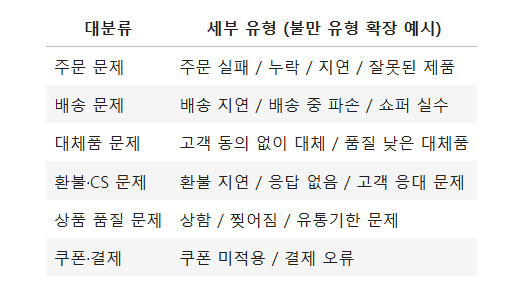

In [16]:
from konlpy.tag import Okt
okt = Okt()

def clean_and_tokenize(text):
    # ÏòàÏãú: Î™ÖÏÇ¨ Ï∂îÏ∂ú + Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    stopwords = ['Ï†ïÎßê', 'ÏßÑÏßú', 'ÎÑàÎ¨¥', 'Í±∞Ïùò', 'Í∑∏ÎÉ•', 'Ï¢Ä', 'Í≤É', 'Í±∞', 'ÏóêÏÑú', 'ÏúºÎ°ú', 'ÌïòÍ≤å', 'Ìï¥ÏÑú']
    tokens = okt.nouns(text)
    tokens = [word for word in tokens if word not in stopwords and len(word) > 1]
    return tokens

# Ï†ÅÏö©
df['tokens_cluster'] = df['Î¶¨Î∑∞'].apply(clean_and_tokenize)
from konlpy.tag import Okt
okt = Okt()
def tokenize(text):
    return [w for w, pos in okt.pos(text) if pos in ['Noun']]

-> ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÏÑù(kmeans,pca)ÏóêÏÑúÎäî TF-IDF Î≤°ÌÑ∞ÌôîÎ•º ÏàòÏπòÌôîÌï¥ÏÑú Í±∞Î¶¨ Í∏∞Î∞òÏúºÎ°ú Î∂ÑÏÑùÌïòÎäîÍ≤å Îçî Î™ÖÌôïÌïú Íµ¨Î∂ÑÏùÑ ÎßåÎì§Ïñ¥ÎÉÑ 
- ÌòïÏö©ÏÇ¨, ÎèôÏÇ¨Îäî ÏùòÎØ∏Ïùò Î∂ÑÏÇ∞ÏùÑ ÌÇ§Ïö∞Í∏∞ÎïåÎ¨∏Ïóê Ï†úÏô∏ÌïòÍ≥† Î™ÖÏÇ¨Îßå Ïû°ÏùÄÍ±∞

|ÎåÄÎ∂ÑÎ•ò	      |ÏÑ∏Î∂Ä Ïú†Ìòï (Î∂àÎßå Ïú†Ìòï ÌôïÏû• ÏòàÏãú)|
Ï£ºÎ¨∏ Î¨∏Ï†ú     |	Ï£ºÎ¨∏ Ïã§Ìå® / ÎàÑÎùΩ / ÏßÄÏó∞ / ÏûòÎ™ªÎêú Ï†úÌíà |
Î∞∞ÏÜ° Î¨∏Ï†ú     |	Î∞∞ÏÜ° ÏßÄÏó∞ / Î∞∞ÏÜ° Ï§ë ÌååÏÜê / ÏáºÌçº Ïã§Ïàò  |
ÎåÄÏ≤¥Ìíà Î¨∏Ï†ú   |	Í≥†Í∞ù ÎèôÏùò ÏóÜÏù¥ ÎåÄÏ≤¥ / ÌíàÏßà ÎÇÆÏùÄ ÎåÄÏ≤¥Ìíà |
ÌôòÎ∂à¬∑CS Î¨∏Ï†ú  |	ÌôòÎ∂à ÏßÄÏó∞ / ÏùëÎãµ ÏóÜÏùå / Í≥†Í∞ù ÏùëÎåÄ Î¨∏Ï†ú |
ÏÉÅÌíà ÌíàÏßà Î¨∏Ï†ú|	ÏÉÅÌï® / Ï∞¢Ïñ¥Ïßê / Ïú†ÌÜµÍ∏∞Ìïú Î¨∏Ï†ú          |
Ïø†Ìè∞¬∑Í≤∞Ï†ú     |	Ïø†Ìè∞ ÎØ∏Ï†ÅÏö© / Í≤∞Ï†ú Ïò§Î•ò                |



df_filtered = df[df['filtered_tokens'].apply(lambda x: len(x) > 2)].copy() 
- Ïù¥Ï†ÑÏóêÎäî Î™®Î•¥Í≥† Ïù¥Í±∞ ÌïòÎÇòÎ°ú ÌïÑÌÑ∞ÎßÅÌñàÏßÄÎßå 
LDAÏôÄ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎëòÎã§ Í≥†Î†§Ìï¥ÏÑú ÌïÑÌÑ∞ÎßÅÌï¥ÏïºÌï® 

In [19]:
df_filtered = df[
    (df['tokens_cluster'].apply(lambda x: len(x) > 2)) &
    (df['tokens_LDA'].apply(lambda x: len(x) > 2))
].copy()

In [22]:
# Ï†ÑÏ≤¥ Î¶¨Î∑∞ Ïàò
print("Ï†ÑÏ≤¥ Î¶¨Î∑∞ Ïàò:", len(df))

# LDAÏö© ÌïÑÌÑ∞ÎßÅ
df_lda = df[df['tokens_LDA'].apply(lambda x: len(x) >= 2)].copy()
print("LDA Ï†ÑÏ≤òÎ¶¨ ÌõÑ Î¶¨Î∑∞ Ïàò:", len(df_lda))
print("LDA ÌïÑÌÑ∞ÎßÅ ÎπÑÏú®:", round(100 - len(df_lda)/len(df)*100, 2), "%")

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏö© ÌïÑÌÑ∞ÎßÅ
df_cluster = df[df['tokens_cluster'].apply(lambda x: len(x) >= 2)].copy()
print("ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ï†ÑÏ≤òÎ¶¨ ÌõÑ Î¶¨Î∑∞ Ïàò:", len(df_cluster))
print("ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌïÑÌÑ∞ÎßÅ ÎπÑÏú®:", round(100 - len(df_cluster)/len(df)*100, 2), "%")


Ï†ÑÏ≤¥ Î¶¨Î∑∞ Ïàò: 68744
LDA Ï†ÑÏ≤òÎ¶¨ ÌõÑ Î¶¨Î∑∞ Ïàò: 65422
LDA ÌïÑÌÑ∞ÎßÅ ÎπÑÏú®: 4.83 %
ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ï†ÑÏ≤òÎ¶¨ ÌõÑ Î¶¨Î∑∞ Ïàò: 68744
ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌïÑÌÑ∞ÎßÅ ÎπÑÏú®: 0.0 %


In [28]:
from gensim import corpora
from gensim.models import LdaModel

# 1. Ï†ÑÏ≤òÎ¶¨Îêú ÌÖçÏä§Ìä∏ Î¶¨Ïä§Ìä∏ ÏÇ¨Ïö©
texts = df_lda['tokens_LDA'].tolist()

# 2. ÏÇ¨Ï†Ñ(dictionary) ÏÉùÏÑ±
dictionary = corpora.Dictionary(texts)

# 3. ÏΩîÌçºÏä§(corpus) ÏÉùÏÑ± (Bag-of-Words ÌòïÌÉú)
corpus = [dictionary.doc2bow(text) for text in texts]

# 4. LDA Î™®Îç∏ ÌïôÏäµ
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    passes=10
)

# 5. Î¨∏ÏÑúÎ≥Ñ ÌÜ†ÌîΩ Î≤°ÌÑ∞ Ï∂îÏ∂ú
lda_vectors = [
    lda_model.get_document_topics(bow, minimum_probability=0)
    for bow in corpus
]

# 6. NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò + argmaxÎ°ú ÎåÄÌëú ÌÜ†ÌîΩ Ìï†Îãπ
import numpy as np
lda_vectors = np.array([[prob for _, prob in doc] for doc in lda_vectors])
df_lda = df_lda.iloc[:len(lda_vectors)].copy()
df_lda['topic_cluster'] = np.argmax(lda_vectors, axis=1)


In [30]:

len(lda_vectors)

65422

| Íµ¨Î∂Ñ                    | Ïó≠Ìï†                     | ÌäπÏßï                                                   |
| --------------------- | ---------------------- | ---------------------------------------------------- |
| **impact\_factors**   | **Î∂àÎßå Ïú†Ìòï Î∂ÑÎ•òÏö© (Ï†ïÎ∞Ä)**     | ÏùòÎØ∏ ÏûàÎäî Î¨∏Ï†ú Ïú†Ìòï(=Î∂àÎßå Ïπ¥ÌÖåÍ≥†Î¶¨)ÏùÑ **ÏßÅÏ†ë Îß§Ìïë**ÌïòÍ∏∞ ÏúÑÌïú **Ï†ïÏ†úÎêú ÌÇ§ÏõåÎìú ÏÑ∏Ìä∏** |
| **general\_keywords** | **Î≥¥Ï°∞ ÌÉêÏÉâ ÎòêÎäî ÌïÑÌÑ∞ÎßÅÏö© (ÏùºÎ∞ò)** | ÎÑàÎ¨¥ Ìè¨Í¥ÑÏ†ÅÏù¥Í±∞ÎÇò Ï§ëÎ¶ΩÏ†ÅÏù∏ Îã®Ïñ¥Îì§Ïù¥ ÎßéÏïÑ, **Îã®ÎèÖÏúºÎ°ú Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•òÌïòÍ∏∞ÏóêÎäî Î™®Ìò∏**Ìï®     |


In [31]:
impact_factors = {
    "Ï£ºÎ¨∏ Î¨∏Ï†ú": [
        "Ï£ºÎ¨∏ Ïã§Ìå®", "Ï£ºÎ¨∏ ÎàÑÎùΩ", "Ï£ºÎ¨∏ ÏßÄÏó∞", "ÏûòÎ™ªÎêú Ï†úÌíà", "ÎàÑÎùΩ", "ÏßÄÏó∞"
    ],
    "Î∞∞ÏÜ° Î¨∏Ï†ú": [
        "Î∞∞ÏÜ° ÏßÄÏó∞", "ÌååÏÜê", "Íπ®Ïßê", "Ï∞åÍ∑∏Îü¨Ïßê", "ÏáºÌçº", "shopper", "ÎäêÎ¶º", "Î∞∞ÏÜ°", "Î¨∏Ï†ú"
    ],
    "ÎåÄÏ≤¥Ìíà Î¨∏Ï†ú": [
        "ÎåÄÏ≤¥", "ÎåÄÏã†", "ÏûòÎ™ªÎêú", "Îã§Î•∏", "ÏõêÌïòÏßÄ", "ÏóâÎö±Ìïú", "Í≥†Í∞ù ÎèôÏùò ÏóÜÏù¥", "ÎßòÏóê ÏïàÎì¶", "ÌíàÏßà ÎÇÆÏùÄ"
    ],
    "ÌôòÎ∂à¬∑CS Î¨∏Ï†ú": [
        "ÌôòÎ∂à", "ÌôòÎ∂à ÏßÄÏó∞", "Ï∑®ÏÜå", "Î∂àÍ∞Ä", "Í∏∞Î°ù ÏóÜÏùå", "ÏùëÎãµ ÏóÜÏùå", "Ïó∞ÎùΩ ÏóÜÏùå", "ÏùëÎåÄ", "Í≥†Í∞ùÏÑºÌÑ∞", "ÎãµÎ≥Ä", "ÏùëÎãµ", "Ïó∞ÎùΩÎëêÏ†à"
    ],
    "ÏÉÅÌíà ÌíàÏßà Î¨∏Ï†ú": [
        "ÏÉÅÌïòÎã§", "Ïç©Îã§", "Î∂àÎüâ", "ÎÉÑÏÉà", "Ïã†ÏÑ†", "Ìè¨Ïû•", "Î≥ÄÏßà", "Ïú†ÌÜµÍ∏∞Ìïú", "ÏÉÅÌï®", "Ï∞¢Ïñ¥Ïßê"
    ],
    "Ïø†Ìè∞¬∑Í≤∞Ï†ú": [
        "Ïø†Ìè∞", "ÎØ∏Ï†ÅÏö©", "Í≤∞Ï†ú", "Í≤∞Ï†ú Ïò§Î•ò", "Ïò§Î•ò", "Ìï†Ïù∏", "Ï†ÅÏö© ÏïàÎê®", "Í≤∞Ï†ú ÏïàÎê®"
    ]
}
# 2. ÏùºÎ∞ò ÌÇ§ÏõåÎìú Ï†ïÏùò
general_keywords = [
    "Ï£ºÎ¨∏", "ÌôòÎ∂à", "ÏáºÌçº", "ÏÉÅÌíà", "ÏÑúÎπÑÏä§", "ÏöîÏ≤≠", "ÏùëÎãµ", 
    "ÎåÄÏ≤¥", "Î¨ºÌíà", "Ï†úÌíà", "Î¨∏Ï†ú", "ÏÇ¨Ïö©", "ÏáºÌïë"
]

# 3. impact_factorsÏôÄ general_keywords Ìï©Ï≥êÏÑú all_keywords ÏÉùÏÑ±
all_keywords = set(general_keywords)
for keywords in impact_factors.values():
    all_keywords.update(keywords)

| Î™©Ï†Å                        | Ï∂îÏ≤ú Ïª¨Îüº            | Ïù¥Ïú†                 |
| ------------------------- | ---------------- | ------------------ |
| ÏùòÎØ∏ ÏûàÎäî Î¨∏Ïû• Ï∂îÏ∂ú, Î∂àÎßå Ïú†Ìòï ÌÇ§ÏõåÎìú Î∂ÑÏÑù | `tokens_lda`     | ÌÇ§ÏõåÎìú Îß§Ïπ≠Î•† ÎÜíÍ≥†, ÌëúÌòÑ ÌíçÎ∂Ä  |
| Îã®Ïàú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ or Î≤îÏ£º Î∂ÑÌè¨         | `tokens_cluster` | Îπ†Î•¥Í≥† Î™ÖÎ£åÌïòÏßÄÎßå Ï†ïÎ≥¥ ÏÜêÏã§ ÏûàÏùå |
-> tokens_LDA ÏÇ¨Ïö©ÌïòÎäîÍ≤å Îçî Ï†ÅÌï©Ìï®

In [ ]:
# Ï§ëÎ≥µÎêú Î¨∏Ïû•ÏùÑ Ï†ÄÏû•ÌïòÏßÄ ÏïäÎèÑÎ°ù ÏÑ∏Ìä∏ ÏÉùÏÑ±
printed_sentences = set()

for keyword in all_keywords:
    print(f"\n< {keyword.upper()} Í¥ÄÎ†® Î¨∏Ïû•Îì§ >")
    
    subset = df_lda[df_lda['tokens_LDA'].apply(lambda tokens: keyword in tokens)]

    count = 0  # Í∞Å ÌÇ§ÏõåÎìúÏóêÏÑú ÏµúÎåÄ 2Í∞úÍπåÏßÄÎßå Ï∂úÎ†•
    for s in subset['Î¶¨Î∑∞'].tolist():
        if s not in printed_sentences:
            print("-", s)
            printed_sentences.add(s)
            count += 1
        if count == 2:
            break  # ÏµúÎåÄ 2Í∞úÍπåÏßÄÎßå Ï∂úÎ†•



< ÏöîÏ≤≠ Í¥ÄÎ†® Î¨∏Ïû•Îì§ >
- ÎÇ¥Í∞Ä Ï£ºÎ¨∏ÌïòÍ≥† Î∞∞Îã¨ÏùÑ ÏÇ¨Î¨¥Ïã§Î°ú Î∞õÏùÄ Îëê Î≤àÏùò Í≤ΩÌóò Î™®Îëê Î¨∏Ï†úÍ∞Ä ÏûàÏóàÏäµÎãàÎã§. Ïñ¥Îñ§ Ïù¥Ïú†Î°ú Ïù∏Ìï¥ Ïï±Ïùò Îß§ÌïëÏù¥ Ïö¥Ï†ÑÏûêÎ•º ÏôÑÏ†ÑÌûà Îã§Î•∏ ÎèÑÏãúÎ°ú Î≥¥ÎÉàÏäµÎãàÎã§. Ïö¥Ï†ÑÏûêÏóêÍ≤å Î©îÏãúÏßÄÎ•º Î≥¥ÎÇ¥ÏÑú GPSÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í±¥Î¨ºÏùÑ Ï∞æÎèÑÎ°ù ÏöîÏ≤≠ÌñàÏäµÎãàÎã§ (Ïã§Ï†ú ÏãúÏ≤≠ Í±¥Î¨º). Ïö¥Ï†ÑÏûêÎäî ÎÇòÏôÄ ÏÜåÌÜµÌïòÎã§Í∞Ä Í∞ëÏûêÍ∏∞ ÏùëÎãµÏùÑ Î©àÏ∑ÑÏäµÎãàÎã§. Í∑∏ Ï†ÑÍπåÏßÄ ÏïΩ 25Î∂Ñ ÎèôÏïà ÏÜåÌÜµÌñàÏäµÎãàÎã§. Í∑∏Îäî Ï£ºÎ¨∏ÏùÑ Î∞∞Îã¨ÌñàÎã§Í≥† ÌëúÏãúÌñàÏßÄÎßå, ÎÇòÎäî Ï£ºÎ¨∏ÏùÑ Î∞õÏßÄ Î™ªÌñàÏäµÎãàÎã§. InstacartÏóê Ïó∞ÎùΩÌñàÏùÑ Îïå, Ï£ºÎ¨∏ÏùÄ ÌôòÎ∂àÎêòÏóàÏßÄÎßå Ïö¥Ï†ÑÏûê ÌåÅÏùÄ ÎÇ¥Í≤å Ï≤≠Íµ¨ÎêòÏóàÏäµÎãàÎã§ - ÎÇòÏôÄÏùò ÏÜåÌÜµÏùÑ Î©àÏ∂îÍ≥† Ï£ºÎ¨∏ÏùÑ Î∞∞Îã¨ÌïòÏßÄ ÏïäÏùÄ Ïö¥Ï†ÑÏûêÏóê ÎåÄÌïú ÌåÅÏù¥ÏóàÏäµÎãàÎã§. InstacartÏóê Ïó¨Îü¨ Ï∞®Î°Ä Ïó∞ÎùΩÌñàÏßÄÎßå, ÌåÅÏùÄ ÌôòÎ∂àÎêòÏßÄ ÏïäÏùÑ Í≤ÉÏù¥ÎùºÍ≥† ÏïåÎ†§Ï£ºÏóàÏäµÎãàÎã§. ÎÇòÎäî Îã§ÏãúÎäî InstacartÎ•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏùÑ Í≤ÉÏù¥Î©∞, ÏπúÍµ¨, Í∞ÄÏ°± Î∞è ÎèôÎ£åÎì§ÏóêÍ≤å InstacartÏùò Î∂àÎßåÏ°

In [40]:
meaningful_keywords = {
    "Ï£ºÎ¨∏ Î¨∏Ï†ú": [
        "Ï£ºÎ¨∏ Ïã§Ìå®", "Ï£ºÎ¨∏ ÎàÑÎùΩ", "Ï£ºÎ¨∏ ÏßÄÏó∞", "ÏûòÎ™ªÎêú Ï†úÌíà", "ÎàÑÎùΩ", "ÏßÄÏó∞"
    ],
    "Î∞∞ÏÜ° Î¨∏Ï†ú": [
        "Î∞∞ÏÜ° ÏßÄÏó∞", "ÌååÏÜê", "Íπ®Ïßê", "Ï∞åÍ∑∏Îü¨Ïßê", "ÏáºÌçº", "shopper", "ÎäêÎ¶º", "Î∞∞ÏÜ°", "Î¨∏Ï†ú"
    ],
    "ÎåÄÏ≤¥Ìíà Î¨∏Ï†ú": [
        "ÎåÄÏ≤¥", "ÎåÄÏã†", "ÏûòÎ™ªÎêú", "Îã§Î•∏", "ÏõêÌïòÏßÄ", "ÏóâÎö±Ìïú", "Í≥†Í∞ù ÎèôÏùò ÏóÜÏù¥", "ÎßòÏóê ÏïàÎì¶", "ÎßàÏùåÏóê Îì§ÏßÄ ÏïäÏùå", "ÌíàÏßà ÎÇÆÏùÄ"
    ],
    "ÌôòÎ∂à¬∑CS Î¨∏Ï†ú": [
        "ÌôòÎ∂à", "ÌôòÎ∂à ÏßÄÏó∞", "Ï∑®ÏÜå", "Î∂àÍ∞Ä", "Í∏∞Î°ù ÏóÜÏùå", "ÏùëÎãµ ÏóÜÏùå", "Ïó∞ÎùΩ ÏóÜÏùå", "ÏùëÎåÄ", "Í≥†Í∞ùÏÑºÌÑ∞", "ÎãµÎ≥Ä", "ÏùëÎãµ", "Ïó∞ÎùΩÎëêÏ†à", "Î™ª Î∞õÏùå", "Ïïà Îê®", "ÌôòÎ∂à ÏïàÎê®", "ÌôòÎ∂àÎêòÏßÄ ÏïäÏùå"
    ],
    "ÏÉÅÌíà ÌíàÏßà Î¨∏Ï†ú": [
        "ÏÉÅÌïòÎã§", "Ïç©Îã§", "Î∂àÎüâ", "ÎÉÑÏÉà", "Ïã†ÏÑ†", "Ìè¨Ïû•", "Î≥ÄÏßà", "Ïú†ÌÜµÍ∏∞Ìïú", "ÏÉÅÌï®", "Ï∞¢Ïñ¥Ïßê", "ÏÉÅÌÉú"
    ],
    "Ïø†Ìè∞¬∑Í≤∞Ï†ú": [
        "Ïø†Ìè∞", "ÎØ∏Ï†ÅÏö©", "Í≤∞Ï†ú", "Í≤∞Ï†ú Ïò§Î•ò", "Ïò§Î•ò", "Ìï†Ïù∏", "Ï†ÅÏö© ÏïàÎê®", "Í≤∞Ï†ú ÏïàÎê®"
    ]
}


- meaningful_keywords =  ÎùºÎ≤®ÎßÅÏö© ÏÉÅÏûê ‚Üí "Ïù¥Í±¥ ÌôòÎ∂à Î¨∏Ï†ú Î∞ïÏä§Ïóê ÎÑ£Ïûê!"

- impact_factors = Î¶¨Î∑∞ ÎÇ¥Ïö© ÌôïÏù∏Ïö© ÎèãÎ≥¥Í∏∞ ‚Üí "Ïù¥Í±¥ ÌååÏÜê + ÏùëÎåÄ Î¨∏Ï†ú ÎïåÎ¨∏Ïù¥ÎÑ§!"

- general_keywords = Î®ºÏßÄ Ï†úÍ±∞Ïö© ÌïÑÌÑ∞ ‚Üí "ÏùòÎØ∏ ÏóÜÎäî Îã®Ïñ¥Îäî ÎπºÍ≥† Î≥¥Ïûê!"

In [46]:
# 1. ÏàòÏûëÏóÖ Î∂ÑÎ•ò: impact_factors Í∏∞Î∞ò Î∂ÑÎ•ò Ï∂îÍ∞Ä
# Î∂àÎßå Ïú†Ìòï Ïπ¥ÌÖåÍ≥†Î¶¨ ÏßÄÏ†ïÌïòÎäîÍ±∞ÏûÑ 
def assign_primary_category(tokens):
    for category, keywords in meaningful_keywords.items():
        if any(k in tokens for k in keywords):
            return category
    return "Í∏∞ÌÉÄ"

df_filtered['impact_category'] = df_filtered['tokens_LDA'].apply(assign_primary_category)

In [47]:
df_filtered['topic_cluster'] = [get_topic_id(doc) for doc in corpus]


In [48]:
print(df_filtered.columns)

Index(['rating', 'review', 'Î¶¨Î∑∞', 'sentences', 'tokens', 'tokens_LDA',
       'tokens_cluster', 'impact_category', 'topic_cluster'],
      dtype='object')


In [49]:
print(df_filtered[['topic_cluster', 'impact_category']].head())

   topic_cluster impact_category
0              2           Î∞∞ÏÜ° Î¨∏Ï†ú
0              2          ÎåÄÏ≤¥Ìíà Î¨∏Ï†ú
0              1              Í∏∞ÌÉÄ
0              2        ÌôòÎ∂à¬∑CS Î¨∏Ï†ú
0              2              Í∏∞ÌÉÄ


ÏúÑÏóê printÎ¨∏ ÎëêÍ∞úÎäî Î∞îÎ°úÎ∞ëÏóê ÌûàÌä∏ÎßµÏóêÏÑú Ïò§Î•òÎÇòÏÑú Ï†úÎåÄÎ°ú topic_clusterÍ∞Ä ÏûòÎì§Ïñ¥Í∞ÑÍ≤å ÎßûÎäîÏßÄ ÌôïÏù∏ÌïúÍ±∞Îùº ÏúÑÏóêÎäî ÏïàÌïòÏÖîÎèÑ ÎêòÏñ¥Ïöî ! 

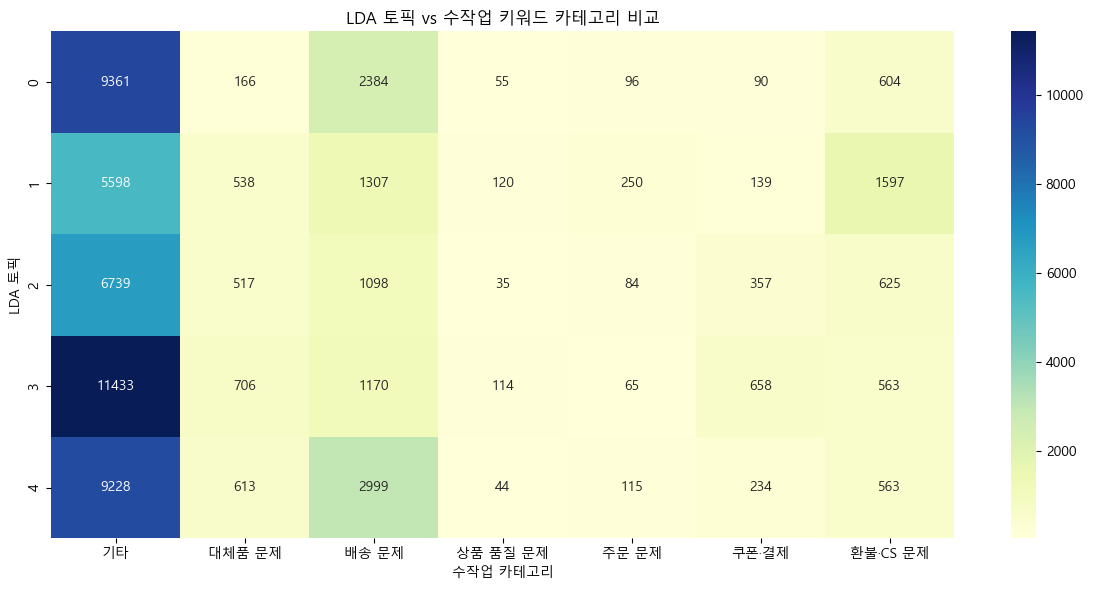

In [51]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

# Ïù¥ÌõÑ ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
sns.heatmap(comparison_table, annot=True, fmt='d', cmap="YlGnBu")
plt.title("LDA ÌÜ†ÌîΩ vs ÏàòÏûëÏóÖ ÌÇ§ÏõåÎìú Ïπ¥ÌÖåÍ≥†Î¶¨ ÎπÑÍµê")
plt.xlabel("ÏàòÏûëÏóÖ Ïπ¥ÌÖåÍ≥†Î¶¨")
plt.ylabel("LDA ÌÜ†ÌîΩ")
plt.tight_layout()
plt.show()


-> LDA ÌÜ†ÌîΩÏù¥ ÏßÄÏ†ïÏù¥ ÏàòÏûëÏóÖ ÌÇ§ÏõåÎìú Ïπ¥ÌÖåÍ≥†Î¶¨Î≥¥Îã§ Îçî ÎÇòÏùå

In [ ]:
# LDA ÌÜ†ÌîΩ ÎåÄÌëú ÌÇ§ÏõåÎìú Ï∂úÎ†•ÌïòÎ©¥ÏÑú ÌÇ§ÏõåÎìú ÌôïÏù∏ÌïòÍ∏∞
for i, topic in lda_model.show_topics(num_topics=5, num_words=10, formatted=False):
    keywords = ", ".join([word for word, _ in topic])
    print(f"üß† Topic {i}: {keywords}")

üß† Topic 0: Ïπ¥Ìä∏, Ïù∏Ïä§ÌÉÄ, ÏÑúÎπÑÏä§, Ïù¥Îã§, Í≥†Í∞ù, Í∑∏, Î¨∏Ï†ú, ÏóÜÎã§, ÏÇ¨Ïö©, Ï†Ä
üß† Topic 1: Ï£ºÎ¨∏, Îçî, ÌôòÎ∂à, Ï∑®ÏÜå, ÏãùÎ£åÌíà, Î∞∞Îã¨, ÎÇ¥, Í∞ÄÍ≤©, Í∑∏, ÏáºÌçº
üß† Topic 2: Í∑∏, ÏãúÍ∞Ñ, Ï£ºÎ¨∏, ÌõÑ, Î≤à, Ï†ú, ÎèÑÏ∞©, Ïö¥Ï†ÑÏûê, Îëê, Í≤ΩÌóò
üß† Topic 3: ÏûàÎã§, Ïï±, Ïàò, ÏóÜÎã§, Ïù¥, ÏÇ¨Ïö©, Í∞ÄÍ≤å, Í∑∏Í≤É, Í∑∏, Ï¢ãÎã§
üß† Topic 4: ÏûàÎã§, Ï£ºÎ¨∏, Ïàò, ÏáºÌïë, Ïù¥Îã§, ÏóÜÎã§, ÏáºÌçº, ÏÑúÎπÑÏä§, Î¨ºÍ±¥, ÎßéÎã§


- tokens_LDAÌï†Îïå Î∂àÏö©Ïñ¥ Ï∂îÍ∞ÄÌñàÏñ¥ÏïºÌï®,,,, „Öé„Öé„Öé
-Ïù¥Îã§, Í∑∏, Ï†Ä, ÏûàÎã§ Ïù¥Îü∞Í±∞ Ï†úÍ±∞ÌïòÎ†§Í≥† Îã§Ïãú custom ÌïúÍ±∞Í≥† Í∑∏Í±∏ Ï†ÅÏö©ÏãúÌÇ§ÎäîÍ±∞ÏóêÏöî:)

In [53]:
custom_stopwords = [
    'Ï†ïÎßê', 'ÏßÑÏßú', 'ÎÑàÎ¨¥', 'Í±∞Ïùò', 'Í∑∏ÎÉ•', 'Ï¢Ä', 'Í≤É', 'Í±∞', 'ÏóêÏÑú', 'ÏúºÎ°ú',
    'ÌïòÍ≤å', 'Ìï¥ÏÑú', 'Ïù¥Îã§', 'ÏûàÎã§', 'Í∑∏', 'Ï†Ä', 'Ïù¥Îü∞', 'Í∑∏Îü∞', 'Í∑∏Î¶¨Í≥†', 'Ïù¥Í±¥', 'Í∑∏Í±¥'
]


In [54]:
def clean_and_tokenize(text):
    tokens = okt.pos(text, stem=True)
    cleaned = [word for word, tag in tokens 
               if tag in ['Noun', 'Adjective'] and word not in custom_stopwords]
    return cleaned


In [62]:
from collections import Counter

# Î™®Îì† tokens_lda ÌéºÏ≥êÏÑú Ìïú Î¶¨Ïä§Ìä∏Î°ú
all_tokens = [token for tokens in df_filtered['tokens_LDA'] for token in tokens]

# ÎπàÎèÑ ÏÑ∏Í∏∞
token_counts = Counter(all_tokens)

# ÏÉÅÏúÑ NÍ∞ú Ï∂úÎ†• (Ïòà: 50Í∞ú)
print("üîé ÏÉÅÏúÑ ÎπàÎèÑ ÌÜ†ÌÅ∞ (Î∂àÏö©Ïñ¥ ÌõÑÎ≥¥):\n")
for word, count in token_counts.most_common(50):
    print(f"{word:<10} ‚Üí {count}")
# Î∂àÏö©Ïñ¥ ÌõÑÎ≥¥ 50Í∞ú ÌôïÏù∏ÌõÑ Ï∂îÍ∞ÄÌïòÍ∏∞

üîé ÏÉÅÏúÑ ÎπàÎèÑ ÌÜ†ÌÅ∞ (Î∂àÏö©Ïñ¥ ÌõÑÎ≥¥):

ÏûàÎã§         ‚Üí 16385
Ï£ºÎ¨∏         ‚Üí 12856
ÏóÜÎã§         ‚Üí 9101
Ïàò          ‚Üí 8480
Í∑∏          ‚Üí 7997
Ïï±          ‚Üí 7319
ÏÑúÎπÑÏä§        ‚Üí 6296
Ïπ¥Ìä∏         ‚Üí 6047
Ïù∏Ïä§ÌÉÄ        ‚Üí 5922
Ïù¥Îã§         ‚Üí 5791
Ïù¥          ‚Üí 5626
ÏÇ¨Ïö©         ‚Üí 5439
Î∞∞Îã¨         ‚Üí 4175
Í≥†Í∞ù         ‚Üí 4054
Îïå          ‚Üí 3810
ÏáºÌçº         ‚Üí 3683
ÎÇ¥          ‚Üí 3681
Îçî          ‚Üí 3405
Î¨∏Ï†ú         ‚Üí 3340
Ï†ú          ‚Üí 3173
Ï¢ãÎã§         ‚Üí 3069
ÏãúÍ∞Ñ         ‚Üí 3061
Î∞∞ÏÜ°         ‚Üí 2946
ÌôòÎ∂à         ‚Üí 2812
Îßê          ‚Üí 2383
ÏáºÌïë         ‚Üí 2350
Ï†Ä          ‚Üí 2286
Î≤à          ‚Üí 2259
Ï∂îÍ∞Ä         ‚Üí 2225
Îã§Î•∏         ‚Üí 2212
ÏúÑÌï¥         ‚Üí 2211
Î¨ºÍ±¥         ‚Üí 2208
Í∞ôÎã§         ‚Üí 2205
ÌõÑ          ‚Üí 2151
ÏÉÅÌíà         ‚Üí 2104
Ï≤≠Íµ¨         ‚Üí 2071
Ï∑®ÏÜå         ‚Üí 2022
ÏàòÏàòÎ£å        ‚Üí 2017
Ìï≠ÏÉÅ         ‚Üí 1937
ÎïåÎ¨∏         ‚Üí 1890
ÎßéÎã§   

- Î∂àÏö©Ïñ¥ Ï∂îÍ∞ÄÌïòÍ≥† Ï†ÅÏö©ÌïòÍ≥† Îã§Ïãú Î™®Îç∏ ÌïôÏäµÏãúÌÇ§Í≥† -> ÌÜ†ÌîΩÌï†ÎãπÌïòÍ≥† -> Í≤∞Í≥ºÌôïÏù∏Ìï†Í±∞ÏûÑ...

In [101]:
from konlpy.tag import Okt

okt = Okt()

# ÏµúÏã† Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏ Ï†ÅÏö©
final_stopwords = [
    'Ï†ïÎßê', 'ÏßÑÏßú', 'ÎÑàÎ¨¥', 'Í±∞Ïùò', 'Í∑∏ÎÉ•', 'Ï¢Ä', 'Í≤É', 'Í±∞', 'ÏóêÏÑú', 'ÏúºÎ°ú',
    'ÌïòÍ≤å', 'Ìï¥ÏÑú', 'ÏûàÎã§', 'ÏóÜÎã§', 'Í∑∏', 'Ïù¥Îã§', 'Ïù¥', 'Îïå', 'ÎÇ¥', 'Îçî', 'Ï†ú',
    'Ïù¥Í≤É', 'Ï†Ä', 'Ïù¥Îü∞', 'Í∑∏Îü∞', 'Í∑∏Î¶¨Í≥†', 'Ïù¥Í±¥', 'Í∑∏Í±¥', 'Ï†ïÎèÑ', 'Í∞ôÎã§'
    ,'Ï†ïÎßê', 'ÏßÑÏßú', 'ÎÑàÎ¨¥', 'Í±∞Ïùò', 'Í∑∏ÎÉ•', 'Ï¢Ä', 'Í≤É', 'Í±∞', 'ÏóêÏÑú', 'ÏúºÎ°ú',
    'ÌïòÍ≤å', 'Ìï¥ÏÑú', 'Ïù¥Îã§', 'ÏûàÎã§', 'Í∑∏', 'Ï†Ä', 'Ïù¥Îü∞', 'Í∑∏Îü∞', 'Í∑∏Î¶¨Í≥†',
    'Ïù¥Í±¥', 'Í∑∏Í±¥', 'Ïù¥', 'Ïàò', 'ÏóÜÎã§', 'ÌõÑ', 'Ï†Ñ', 'ÏÇ¨Ïö©Ïûê'
]

# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
def clean_and_tokenize(text):
    tokens = okt.pos(text, stem=True)
    return [
        word for word, tag in tokens
        if tag in ['Noun', 'Adjective'] and word not in final_stopwords
    ]

# tokens_lda Ïª¨Îüº Ïû¨ÏÉùÏÑ±
df_filtered['tokens_lda'] = df_filtered['Î¶¨Î∑∞'].apply(clean_and_tokenize)


In [102]:
# LDA Î™®Îç∏ Ïû¨ÌïôÏäµÌïòÎäî Í±∞Îûë ÎîïÏÖîÎÑàÎ¶¨,corpus ÏÉùÏÑ±ÌïòÎäîÍ±∞
from gensim import corpora, models

# ÌÖçÏä§Ìä∏ Î¶¨Ïä§Ìä∏
texts = df_filtered['tokens_lda'].tolist()

# ÏÇ¨Ï†Ñ ÏÉùÏÑ± Î∞è Ï†ïÏ†ú
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=2, no_above=0.95)

# Î¨∏ÏÑú-Îã®Ïñ¥ ÌñâÎ†¨ (BoW)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA Î™®Îç∏ ÌïôÏäµ
lda_model = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    passes=10
)

In [103]:
# Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†Ïùò ÌÜ†ÌîΩÏùÑ Î¨∏ÏÑúÏóê Ìï†Îãπ
def get_topic_id(doc_bow):
    topics = lda_model.get_document_topics(doc_bow)
    return sorted(topics, key=lambda x: -x[1])[0][0] if topics else -1

df_filtered['topic_cluster'] = [get_topic_id(doc) for doc in corpus]


In [104]:
for i, topic in lda_model.show_topics(num_topics=5, num_words=10, formatted=False):
    keywords = ", ".join([word for word, _ in topic])
    print(f"üß† Topic {i}: {keywords}")


üß† Topic 0: Ï£ºÎ¨∏, Ïï±, Í≥†Í∞ù, ÏÇ¨Ïö©, ÏÑúÎπÑÏä§, Îã§Ïãú, Ï±ÑÌåÖ, Ï∑®ÏÜå, Ïù¥Î©îÏùº, ÎèÑÏõÄ
üß† Topic 1: Ïï±, Ï¢ãÎã§, ÏÇ¨Ïö©, ÏáºÌçº, ÏÑúÎπÑÏä§, ÏãúÍ∞Ñ, Í∞ÄÍ≤å, ÏáºÌïë, Ïπ¥Ìä∏, ÏãùÎ£åÌíà
üß† Topic 2: Í∑∏Í≤É, ÎÇò, Î©§Î≤ÑÏã≠, ÏúÑÌï¥, ÏÉùÍ∞Å, Ïπ¥Îìú, ÎßéÎã§, Î©ÄÎ¶¨, ÌöåÏõê, Ï∞æÍ∏∞
üß† Topic 3: Ï£ºÎ¨∏, ÏÉÅÌíà, Í∞ÄÍ≤©, Í∞ú, ÏáºÌçº, Ï∑®ÏÜå, Ïû¨Í≥†, ÏãúÍ∞Ñ, Ï†úÌíà, Ïù∏Ïä§ÌÉÄ
üß† Topic 4: Ï£ºÎ¨∏, ÏÑúÎπÑÏä§, Í≥†Í∞ù, ÌôòÎ∂à, Ïù∏Ïä§ÌÉÄ, Ïπ¥Ìä∏, Ï≤≠Íµ¨, Î∞∞Îã¨, Ï∑®ÏÜå, Ïó∞ÎùΩ


In [105]:
# 1. ÌÜ†ÌîΩ Î≤àÌò∏Ïóê Îî∞Î•∏ Ìï¥ÏÑùÎêú ÎùºÎ≤® Ï†ïÏùò
topic_label_map = {
    0: "ÌôòÎ∂à Ï≤òÎ¶¨ ÏßÄÏó∞ Î∞è Í≥†Í∞ù ÏùëÎåÄ Î¨∏Ï†ú",
    1: "ÏõêÏπò ÏïäÎäî ÎåÄÏ≤¥ÏÉÅÌíà Î¨∏Ï†ú",
    2: "ÏÉÅÌíà ÌååÏÜê Î∞è Ïã†ÏÑ†ÎèÑ Î∂àÎßå",
    3: "ÏáºÌçºÏùò ÌÉúÎèÑ Î∞è Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò Î¨∏Ï†ú",
    4: "Ïï±/ÏÑúÎπÑÏä§ Ïò§Î•ò Î∞è ÏÇ¨Ïö©ÏÑ± Î¨∏Ï†ú"
}

# 2. Îß§ÌïëÌïòÏó¨ ÏÉàÎ°úÏö¥ Ïª¨Îüº Ï∂îÍ∞Ä
df_filtered['topic_label'] = df_filtered['topic_cluster'].map(topic_label_map)

-> Ï£ºÎ¨∏Î¨∏Ï†ú, Î∞∞ÏÜ°Î¨∏Ï†ú, ÎåÄÏ≤¥Ìíà Î¨∏Ï†ú, ÌôòÎ∂àCs Î¨∏Ï†ú, ÏÉÅÌíà ÌíàÏßà Î¨∏Ï†ú, Ïø†Ìè∞Í≤∞Ï†úÎ•º Ï≤òÏùåÏóê ÌîºÎìúÎ∞± Ìï¥Ï£ºÏã†Í±∞Î•º Î∞îÌÉïÏúºÎ°ú Î∂ÑÎ•òÌïúÍ±¥Îç∞ ÌÜ†ÌîΩ Î≤àÌò∏Ïóê Îî∞Î•∏ ÎùºÎ≤® Ï†ïÏùòÎ•º Ïù¥Î†áÍ≤å Ìï¥ÎèÑ ÎêòÎÇò? ÏàúÍ∞Ñ Í≥†ÎØºÏù¥ ÎêêÏóàÎäîÎç∞ Ïù¥Í±¥ LDAÎäî ÏûêÎèô ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏù¥Í≥† Ï£ºÏöî ÌÇ§ÏõåÎìúÎ•º Î≥¥Í≥† ÎùºÎ≤®ÏùÑ Ï†ïÏùòÌïúÍ±∞Îùº Í¥úÏ∞ÆÏùÑ Í≤É Í∞ôÎã§Îäî ÌåêÎã®ÏùÑ ÌóÄÏñ¥Ïöî 

In [106]:
# Ï§ëÎ≥µ Î¨∏Ïû• Ï†úÍ±∞Ïö© ÏßëÌï©
seen_sentences = set()

# ÌÜ†ÌîΩÎ≥Ñ Î¨∏Ïû• Ï∂úÎ†•
for topic_id in sorted(df_filtered['topic_cluster'].unique()):
    # Ìï¥Îãπ ÌÜ†ÌîΩÏùò ÎùºÎ≤® Í∞ÄÏ†∏Ïò§Í∏∞
    topic_name = df_filtered[df_filtered['topic_cluster'] == topic_id]['topic_label'].iloc[0]

    print(f"\nüìå [Topic {topic_id}] {topic_name} ")

    # Ï§ëÎ≥µ Ï†úÍ±∞Îêú Î¨∏Ïû•Îßå Ï∂îÏ∂ú
    topic_sentences = df_filtered[df_filtered['topic_cluster'] == topic_id]['sentences'].drop_duplicates()

    count = 0
    for sent in topic_sentences:
        if sent not in seen_sentences:
            print("-", sent)
            seen_sentences.add(sent)
            count += 1
        if count >= 3:
            break


üìå [Topic 0] ÌôòÎ∂à Ï≤òÎ¶¨ ÏßÄÏó∞ Î∞è Í≥†Í∞ù ÏùëÎåÄ Î¨∏Ï†ú 
- ÎßåÏïΩ Ìï† Ïàò ÏûàÎã§Î©¥ 0Ï†êÏùÑ Ï§Ñ Í≤ÉÏûÖÎãàÎã§
- ÏïàÌÉÄÍπùÍ≤åÎèÑ Í∑∏Îü∞ ÏòµÏÖòÏù¥ ÏóÜÏßÄÎßå, ÌïÑÏöîÌïòÎã§Î©¥ Îß§Ïùº Ïù¥ ÏûëÏóÖÏùÑ Ìï† Í≤ÉÏûÖÎãàÎã§
- Ï≤òÏùåÏóê Î©§Î≤ÑÏã≠ÏúºÎ°ú ÎÇòÎ•º ÏÜçÏó¨ÏÑú ÎπÑÏö©ÏùÑ ÎúØÏñ¥ÎÇ¥ÏóàÏùåÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† 1ÎÖÑ ÎèôÏïà Ïù¥ Ïï±ÏùÑ ÏÇ¨Ïö©Ìï¥ ÏôîÏäµÎãàÎã§

üìå [Topic 1] ÏõêÏπò ÏïäÎäî ÎåÄÏ≤¥ÏÉÅÌíà Î¨∏Ï†ú 
- Îã§Î•∏ Ï£ºÏÜåÎ°ú Ï†ÑÌòÄ ÎÇ¥ ÏßëÏù¥ ÏïÑÎãå Í≥≥ÏúºÎ°ú Î∞∞Îã¨Îêú ÏãùÎ£åÌíàÏóê 200Îã¨Îü¨Î•º ÏçºÍ≥†, ÏáºÌçºÏôÄ ÎåÄÌôîÎ•º ÏãúÎèÑÌñàÍ≥†, Ïã§Ï†ú Ï£ºÏÜå/ÏßëÏúºÎ°ú Ï£ºÎ¨∏ÏùÑ Í∞ÄÏ†∏Îã§ Ï§Ñ Ïàò ÏûàÎã§Î©¥ Í∞ÄÏä§ÎπÑÏôÄ Ïù¥ÎèôÎπÑÎ•º Î≥¥ÏÉÅÌï¥Ï£ºÍ≤†Îã§Í≥† Ï†úÏïàÌñàÏßÄÎßå, ÏáºÌçºÎäî Î∞∞Îã¨ÎêòÏóàÎã§Í≥† ÌïòÍ≥† Ï£ºÎ¨∏ÏùÑ Í±∞Í∏∞Ïóê ÎëêÍ≥† Îñ†ÎÇ¨Îã§
- ÎÇòÎäî Î™®Îì† Î¶¨Î∑∞ÏôÄ Ìï≠ÏÜå Í≥ºÏ†ïÏùÑ Í±∞Ï≥§ÏßÄÎßå ÏïÑÎ¨¥Í≤ÉÎèÑ Î∞õÏßÄ Î™ªÌñàÎã§
- 200Îã¨Îü¨Î•º ÎÇ≠ÎπÑÌñàÍ≥†, ÎÇòÎäî ÏàòÎÖÑÍ∞Ñ Ï∂©Ïã§Ìïú Í≥†Í∞ùÏù¥ÏóàÎã§

üìå [Topic 2] ÏÉÅÌíà ÌååÏÜê Î∞è Ïã†ÏÑ†ÎèÑ Î∂àÎßå 
- ÌòïÌé∏ÏóÜÎäî Í≥†Í∞ù ÏÑúÎπÑÏä§ ÎèÑÏõÄ
ÏÜîÏßÅÌûà ÎßêÌï¥Ï

In [107]:
df_filtered['topic_cluster'].value_counts().sort_index()

topic_cluster
0     9719
1    19656
2     4867
3     6325
4    19698
Name: count, dtype: int64

In [108]:

df_filtered.groupby('topic_cluster')['rating'].mean()

topic_cluster
0    1.439037
1    3.236416
2    1.447709
3    1.935178
4    1.563509
Name: rating, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_17464\83927444.py:42: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


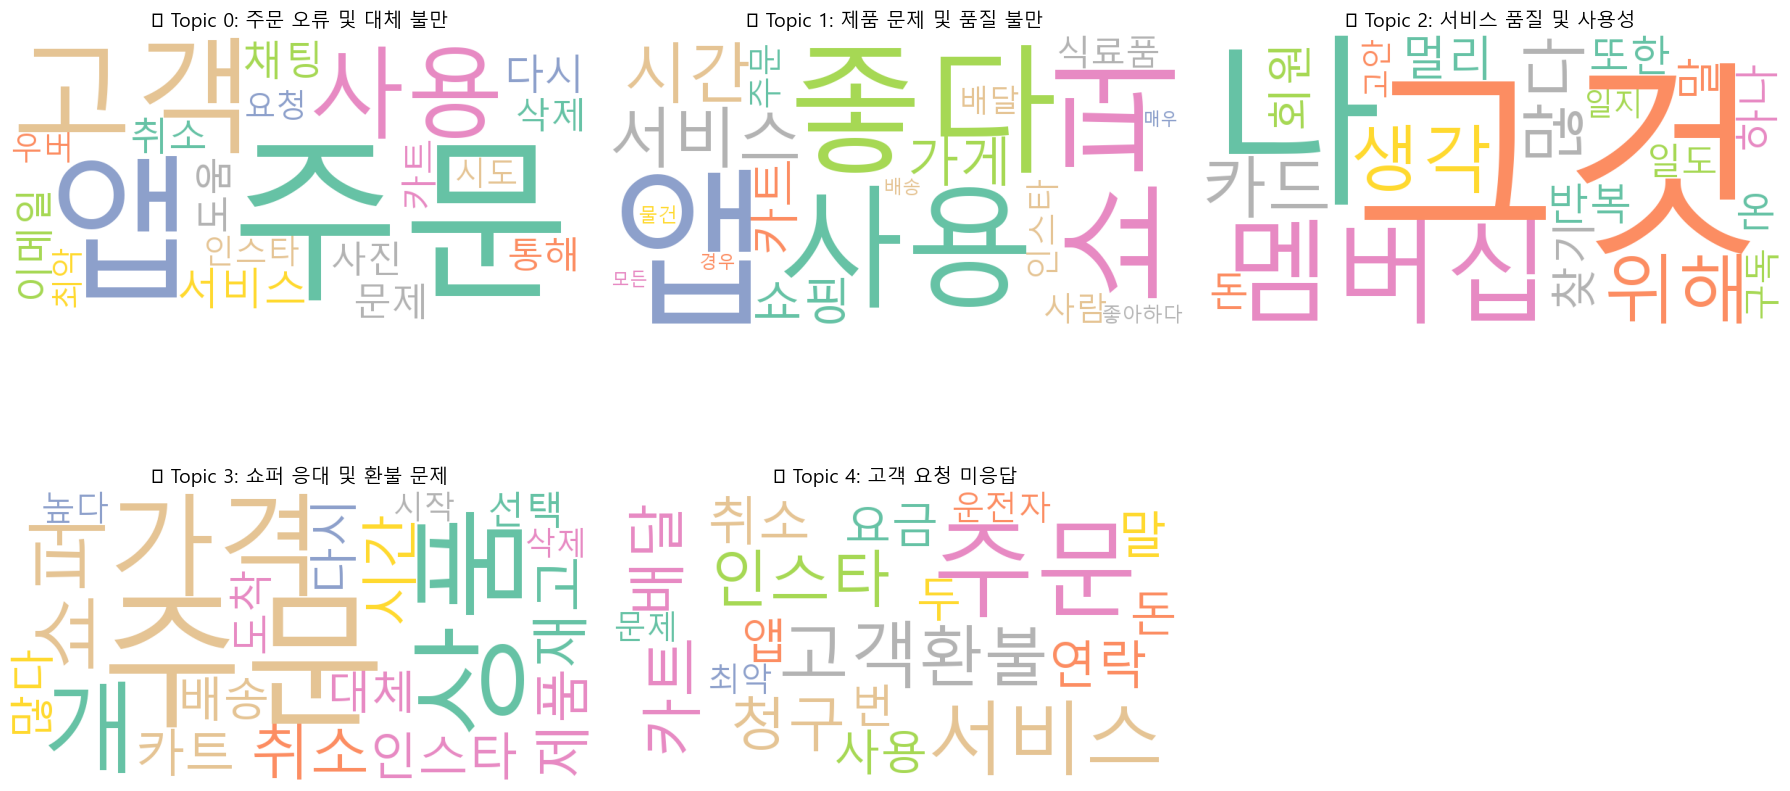

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Ìè∞Ìä∏ ÏÑ§Ï†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# Ï£ºÏ†ú Îß§Ìïë
topic_label_map = {
    0: "ÌôòÎ∂à Ï≤òÎ¶¨ ÏßÄÏó∞ Î∞è Í≥†Í∞ù ÏùëÎåÄ Î¨∏Ï†ú",
    1: "ÏõêÏπò ÏïäÎäî ÎåÄÏ≤¥ÏÉÅÌíà Î¨∏Ï†ú",
    2: "ÏÉÅÌíà ÌååÏÜê Î∞è Ïã†ÏÑ†ÎèÑ Î∂àÎßå",
    3: "ÏáºÌçºÏùò ÌÉúÎèÑ Î∞è Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò Î¨∏Ï†ú",
    4: "Ïï±/ÏÑúÎπÑÏä§ Ïò§Î•ò Î∞è ÏÇ¨Ïö©ÏÑ± Î¨∏Ï†ú"
}

# ÏãúÍ∞ÅÌôî Î†àÏù¥ÏïÑÏõÉ
n_topics = len(topic_labels)
ncols = 3
nrows = (n_topics + ncols - 1) // ncols

plt.figure(figsize=(18, 10))

# üî• Î∞òÎìúÏãú lda_modelÏóêÏÑú show_topics Ìò∏Ï∂ú
for i, (topic_id, topic) in enumerate(lda_model.show_topics(formatted=False, num_words=20)):
    words = dict(topic)
    wc = WordCloud(
        font_path=font_path,
        background_color="white",
        colormap='Set2',
        width=800,
        height=400
    )

    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(wc.generate_from_frequencies(words))
    plt.axis('off')
    title_text = f"üß© Topic {topic_id}: {topic_labels.get(topic_id, 'Unknown')}"
    plt.title(title_text, fontproperties=font_prop, fontsize=14)

plt.tight_layout()
plt.show()


In [110]:

for row in summary_data:
    print(f"\nüß† {row['ÌÜ†ÌîΩ Î≤àÌò∏']} - {row['Î∂àÎßå Ïú†Ìòï']}")
    print(f"üìå Ï£ºÏöî ÌÇ§ÏõåÎìú: {row['ÎåÄÌëú ÌÇ§ÏõåÎìú']}")
    print("üìù ÎåÄÌëú Î¨∏Ïû•:\n" + row['ÎåÄÌëú Î¨∏Ïû•'])


üß† Topic 0 - ÌôòÎ∂à Ï≤òÎ¶¨ ÏßÄÏó∞ Î∞è Í≥†Í∞ù ÏùëÎåÄ Î¨∏Ï†ú
üìå Ï£ºÏöî ÌÇ§ÏõåÎìú: Ïàò, Ïï±, ÏÑúÎπÑÏä§, Ï£ºÎ¨∏, ÏÇ¨Ïö©, ÏãúÍ∞Ñ, Ï¢ãÎã§, Í∞ÄÍ≤å, Í∞ÄÍ≤©, ÎßéÎã§
üìù ÎåÄÌëú Î¨∏Ïû•:
1. ÎßåÏïΩ Ìï† Ïàò ÏûàÎã§Î©¥ 0Ï†êÏùÑ Ï§Ñ Í≤ÉÏûÖÎãàÎã§
2. ÏïàÌÉÄÍπùÍ≤åÎèÑ Í∑∏Îü∞ ÏòµÏÖòÏù¥ ÏóÜÏßÄÎßå, ÌïÑÏöîÌïòÎã§Î©¥ Îß§Ïùº Ïù¥ ÏûëÏóÖÏùÑ Ìï† Í≤ÉÏûÖÎãàÎã§
3. Ï≤òÏùåÏóê Î©§Î≤ÑÏã≠ÏúºÎ°ú ÎÇòÎ•º ÏÜçÏó¨ÏÑú ÎπÑÏö©ÏùÑ ÎúØÏñ¥ÎÇ¥ÏóàÏùåÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† 1ÎÖÑ ÎèôÏïà Ïù¥ Ïï±ÏùÑ ÏÇ¨Ïö©Ìï¥ ÏôîÏäµÎãàÎã§

üß† Topic 1 - ÏõêÏπò ÏïäÎäî ÎåÄÏ≤¥ÏÉÅÌíà Î¨∏Ï†ú
üìå Ï£ºÏöî ÌÇ§ÏõåÎìú: Ï£ºÎ¨∏, ÏÉÅÌíà, ÏÑúÎπÑÏä§, ÌôòÎ∂à, ÏáºÌçº, Î∞∞Îã¨, Ï†úÌíà, Í∞ú, Ï≤≠Íµ¨, Îã§Î•∏
üìù ÎåÄÌëú Î¨∏Ïû•:
1. ÎÇ¥Í∞Ä Ï£ºÎ¨∏ÌïòÍ≥† Î∞∞Îã¨ÏùÑ ÏÇ¨Î¨¥Ïã§Î°ú Î∞õÏùÄ Îëê Î≤àÏùò Í≤ΩÌóò Î™®Îëê Î¨∏Ï†úÍ∞Ä ÏûàÏóàÏäµÎãàÎã§
2. Ïñ¥Îñ§ Ïù¥Ïú†Î°ú Ïù∏Ìï¥ Ïï±Ïùò Îß§ÌïëÏù¥ Ïö¥Ï†ÑÏûêÎ•º ÏôÑÏ†ÑÌûà Îã§Î•∏ ÎèÑÏãúÎ°ú Î≥¥ÎÉàÏäµÎãàÎã§
3. Ïö¥Ï†ÑÏûêÏóêÍ≤å Î©îÏãúÏßÄÎ•º Î≥¥ÎÇ¥ÏÑú GPSÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í±¥Î¨ºÏùÑ Ï∞æÎèÑÎ°ù ÏöîÏ≤≠ÌñàÏäµÎãàÎã§ (Ïã§Ï†ú ÏãúÏ≤≠ Í±¥Î¨º)

üß† Topic 2 - ÏÉÅÌíà ÌååÏÜ

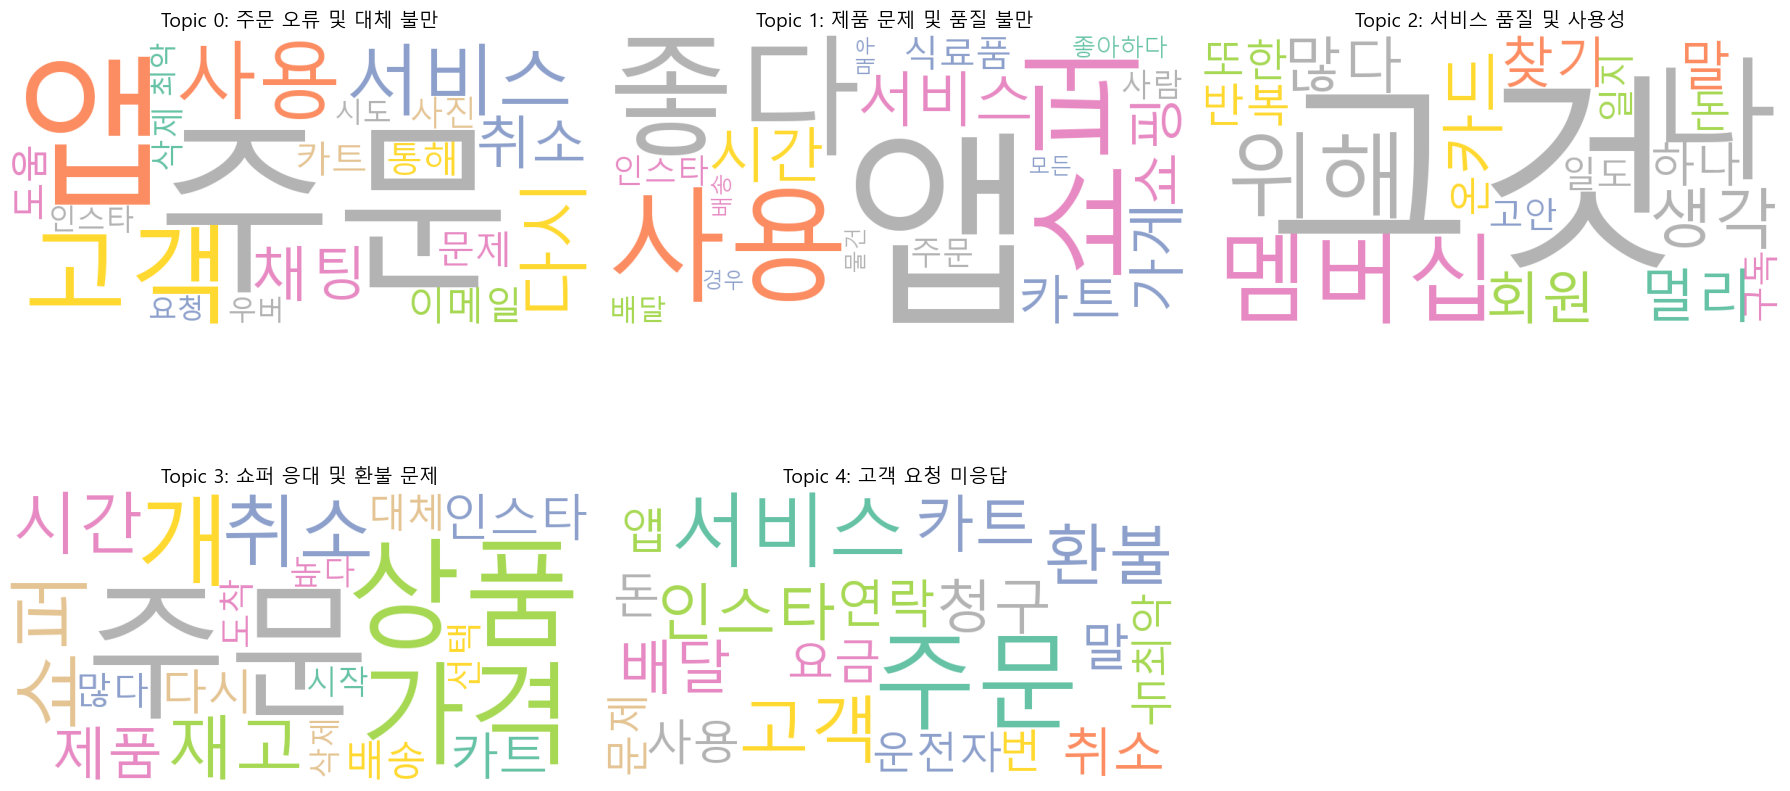

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ìè∞Ìä∏ ÏÑ§Ï†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# Ï£ºÏ†úÎ™Ö Îß§Ìïë
topic_labels = {
    0: "Ï£ºÎ¨∏ Ïò§Î•ò Î∞è ÎåÄÏ≤¥ Î∂àÎßå",
    1: "Ï†úÌíà Î¨∏Ï†ú Î∞è ÌíàÏßà Î∂àÎßå",
    2: "ÏÑúÎπÑÏä§ ÌíàÏßà Î∞è ÏÇ¨Ïö©ÏÑ±",
    3: "ÏáºÌçº ÏùëÎåÄ Î∞è ÌôòÎ∂à Î¨∏Ï†ú",
    4: "Í≥†Í∞ù ÏöîÏ≤≠ ÎØ∏ÏùëÎãµ"
}

# ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
n_topics = len(topic_labels)
ncols = 3
nrows = (n_topics + ncols - 1) // ncols

plt.figure(figsize=(18, 10))

for i, (topic_id, topic) in enumerate(lda_model.show_topics(formatted=False, num_words=20)):
    words = dict(topic)
    wc = WordCloud(font_path=font_path, background_color="white", width=800, height=400)

   
    wc = WordCloud(
        font_path=font_path,
        background_color="white",
        colormap= 'Set2',
        width=800,
        height=400
    )

    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(wc.generate_from_frequencies(words))
    plt.axis('off')
    title_text = f"Topic {topic_id}: {topic_labels.get(topic_id, 'Unknown')}"
    plt.title(title_text, fontproperties=font_prop, fontsize=14)

plt.tight_layout()
plt.show()

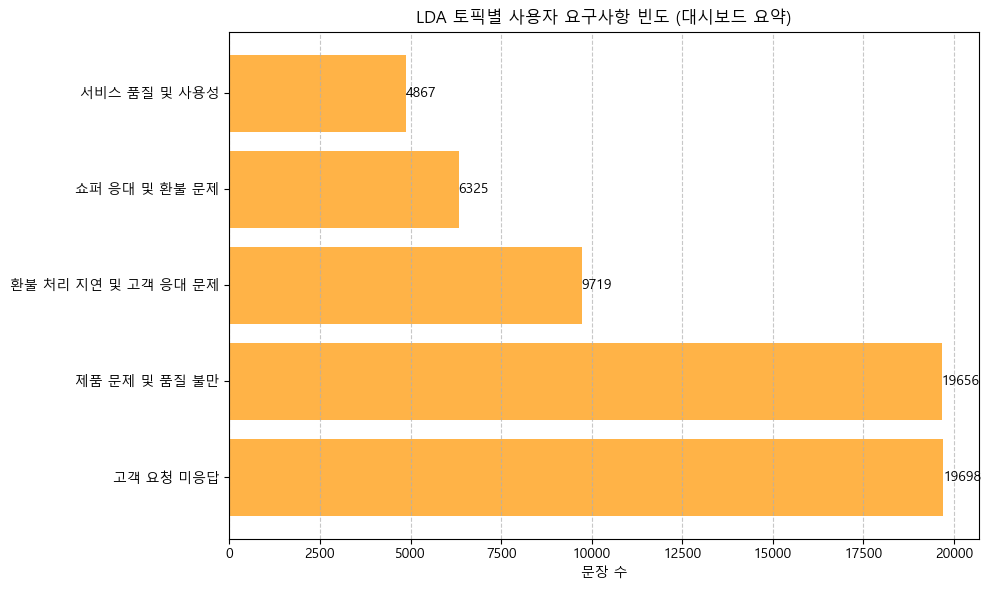

In [112]:
import matplotlib.pyplot as plt

# Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows Í∏∞Ï§Ä)
plt.rcParams['font.family'] = 'Malgun Gothic'

# LDA ÌÜ†ÌîΩ ÎùºÎ≤® Ï†ïÏùò (lda_model Í∏∞Î∞òÏúºÎ°ú Î∂ÑÎ•òÎêú ÌÜ†ÌîΩ Î≤àÌò∏ÏôÄ Îß§Ìïë)
lda_topic_labels = {
    0: "ÌôòÎ∂à Ï≤òÎ¶¨ ÏßÄÏó∞ Î∞è Í≥†Í∞ù ÏùëÎåÄ Î¨∏Ï†ú",
    1: "Ï†úÌíà Î¨∏Ï†ú Î∞è ÌíàÏßà Î∂àÎßå",
    2: "ÏÑúÎπÑÏä§ ÌíàÏßà Î∞è ÏÇ¨Ïö©ÏÑ±",
    3: "ÏáºÌçº ÏùëÎåÄ Î∞è ÌôòÎ∂à Î¨∏Ï†ú",
    4: "Í≥†Í∞ù ÏöîÏ≤≠ ÎØ∏ÏùëÎãµ"
}

# LDA Í∏∞Î∞ò Î¨∏Ïû• Ïàò ÏöîÏïΩ ÌÖåÏù¥Î∏î
lda_summary = df_filtered['topic_cluster'].map(lda_topic_labels).value_counts().reset_index()
lda_summary.columns = ['ÌÜ†ÌîΩ Ï£ºÏ†ú', 'Î¨∏Ïû• Ïàò']
lda_summary = lda_summary.sort_values('Î¨∏Ïû• Ïàò')  # yÏ∂ï Îí§ÏßëÍ∏∞Ïö©

# ÏàòÌèâ ÎßâÎåÄÍ∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 6))
bars = plt.barh(lda_summary['ÌÜ†ÌîΩ Ï£ºÏ†ú'], lda_summary['Î¨∏Ïû• Ïàò'], color="#FFB347")
plt.xlabel("Î¨∏Ïû• Ïàò")
plt.title("LDA ÌÜ†ÌîΩÎ≥Ñ ÏÇ¨Ïö©Ïûê ÏöîÍµ¨ÏÇ¨Ìï≠ ÎπàÎèÑ (ÎåÄÏãúÎ≥¥Îìú ÏöîÏïΩ)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Î∞î ÎùºÎ≤® Ï∂îÍ∞Ä
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{int(bar.get_width())}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [113]:
# LDA ÌÜ†ÌîΩÎ≥Ñ Ï£ºÏöî ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
top_keywords_per_topic = []

for topic_id, topic in lda_model.show_topics(num_topics=5, num_words=10, formatted=False):
    keywords = [word for word, _ in topic]
    top_keywords_per_topic.append({
        "ÌÜ†ÌîΩ": topic_id,
        "ÎåÄÌëú ÌÇ§ÏõåÎìú": ", ".join(keywords)
    })

# DataFrameÏúºÎ°ú Î≥ÄÌôò
df_top_keywords_lda = pd.DataFrame(top_keywords_per_topic)
df_top_keywords_lda

ÌÜ†ÌîΩ                                    ÎåÄÌëú ÌÇ§ÏõåÎìú
0   0   Ï£ºÎ¨∏, Ïï±, Í≥†Í∞ù, ÏÇ¨Ïö©, ÏÑúÎπÑÏä§, Îã§Ïãú, Ï±ÑÌåÖ, Ï∑®ÏÜå, Ïù¥Î©îÏùº, ÎèÑÏõÄ
1   1   Ïï±, Ï¢ãÎã§, ÏÇ¨Ïö©, ÏáºÌçº, ÏÑúÎπÑÏä§, ÏãúÍ∞Ñ, Í∞ÄÍ≤å, ÏáºÌïë, Ïπ¥Ìä∏, ÏãùÎ£åÌíà
2   2    Í∑∏Í≤É, ÎÇò, Î©§Î≤ÑÏã≠, ÏúÑÌï¥, ÏÉùÍ∞Å, Ïπ¥Îìú, ÎßéÎã§, Î©ÄÎ¶¨, ÌöåÏõê, Ï∞æÍ∏∞
3   3    Ï£ºÎ¨∏, ÏÉÅÌíà, Í∞ÄÍ≤©, Í∞ú, ÏáºÌçº, Ï∑®ÏÜå, Ïû¨Í≥†, ÏãúÍ∞Ñ, Ï†úÌíà, Ïù∏Ïä§ÌÉÄ
4   4  Ï£ºÎ¨∏, ÏÑúÎπÑÏä§, Í≥†Í∞ù, ÌôòÎ∂à, Ïù∏Ïä§ÌÉÄ, Ïπ¥Ìä∏, Ï≤≠Íµ¨, Î∞∞Îã¨, Ï∑®ÏÜå, Ïó∞ÎùΩ

In [115]:
clusters = df_top_keywords_lda['ÌÜ†ÌîΩ'].unique()
clusters

array([0, 1, 2, 3, 4], dtype=int64)

In [116]:
print(df_top_keywords_lda.columns)

Index(['ÌÜ†ÌîΩ', 'ÎåÄÌëú ÌÇ§ÏõåÎìú'], dtype='object')


In [117]:
# gensim LDA Î™®Îç∏Î°úÎ∂ÄÌÑ∞ ÌÜ†ÌîΩ ÌÇ§ÏõåÎìú Í∞ÄÏ†∏Ïò§Í∏∞
top_keywords = []
for topic_id in range(lda_model.num_topics):
    for word, prob in lda_model.show_topic(topic_id, topn=10):
        top_keywords.append({'ÌÜ†ÌîΩ': topic_id, 'ÌÇ§ÏõåÎìú': word, 'Îì±Ïû• ÌôïÎ•†': round(prob * 100, 2)})

df_keywords_bar = pd.DataFrame(top_keywords)


In [118]:
top_keywords = []
for topic_id in range(lda_model.num_topics):
    for word, prob in lda_model.show_topic(topic_id, topn=10):
        top_keywords.append({
            'ÌÜ†ÌîΩ': topic_id,
            'ÌÇ§ÏõåÎìú': word,
            'Îì±Ïû• ÌôïÎ•†': round(prob * 100, 2)
        })

df_keywords_bar = pd.DataFrame(top_keywords)

- LDA ÌÜ†ÌîΩÎßàÎã§ Ïñ¥Îñ§ ÌÇ§ÏõåÎìúÍ∞Ä ÏñºÎßàÎÇò ÏûêÏ£º Îì±Ïû•ÌñàÎäîÏßÄ Í∂ÅÍ∏àÌï¥ÏÑú ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÎÇòÌÉÄÎÇ¥Í∏∞ ÏúÑÌï¥ ÏúÑÏóê ÏΩîÎìúÎ°ú ÎßåÎì†Í±∞Í≥† 
- ÌÜ†ÌîΩ 4Í∞úÏ§ë ÏÉÅÏúÑ 10Í∞ú ÌÇ§ÏõåÎìúÎ•º ÎΩëÍ≥† Îã®ÏàúÌûà Ïπ¥Ïö¥Ìä∏ÌïòÎäîÍ≤ÉÎ≥¥Îã§ ÌôïÎ•†Î°ú ÎÇòÌÉÄÎÇ¥Î©¥ ÌÜ†ÌîΩÏùò ÏùòÎØ∏Î•º Ïïå Ïàò ÏûàÏßÄ ÏïäÏùÑÍπåÌï¥ÏÑú ÌôïÎ•†Î°ú ÎÇòÌÉÄÎÉàÎäîÎç∞
- ÏÇ¨Ïö©ÏûêÏûÖÏû•ÏóêÏÑú Ïã§Ï†úÎ°ú ÎßéÏù¥ÏçºÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÎπàÎèÑÎ°úÎèÑ ÌôïÏù∏Ìï¥ÏïºÍ≤†Îã§,,,

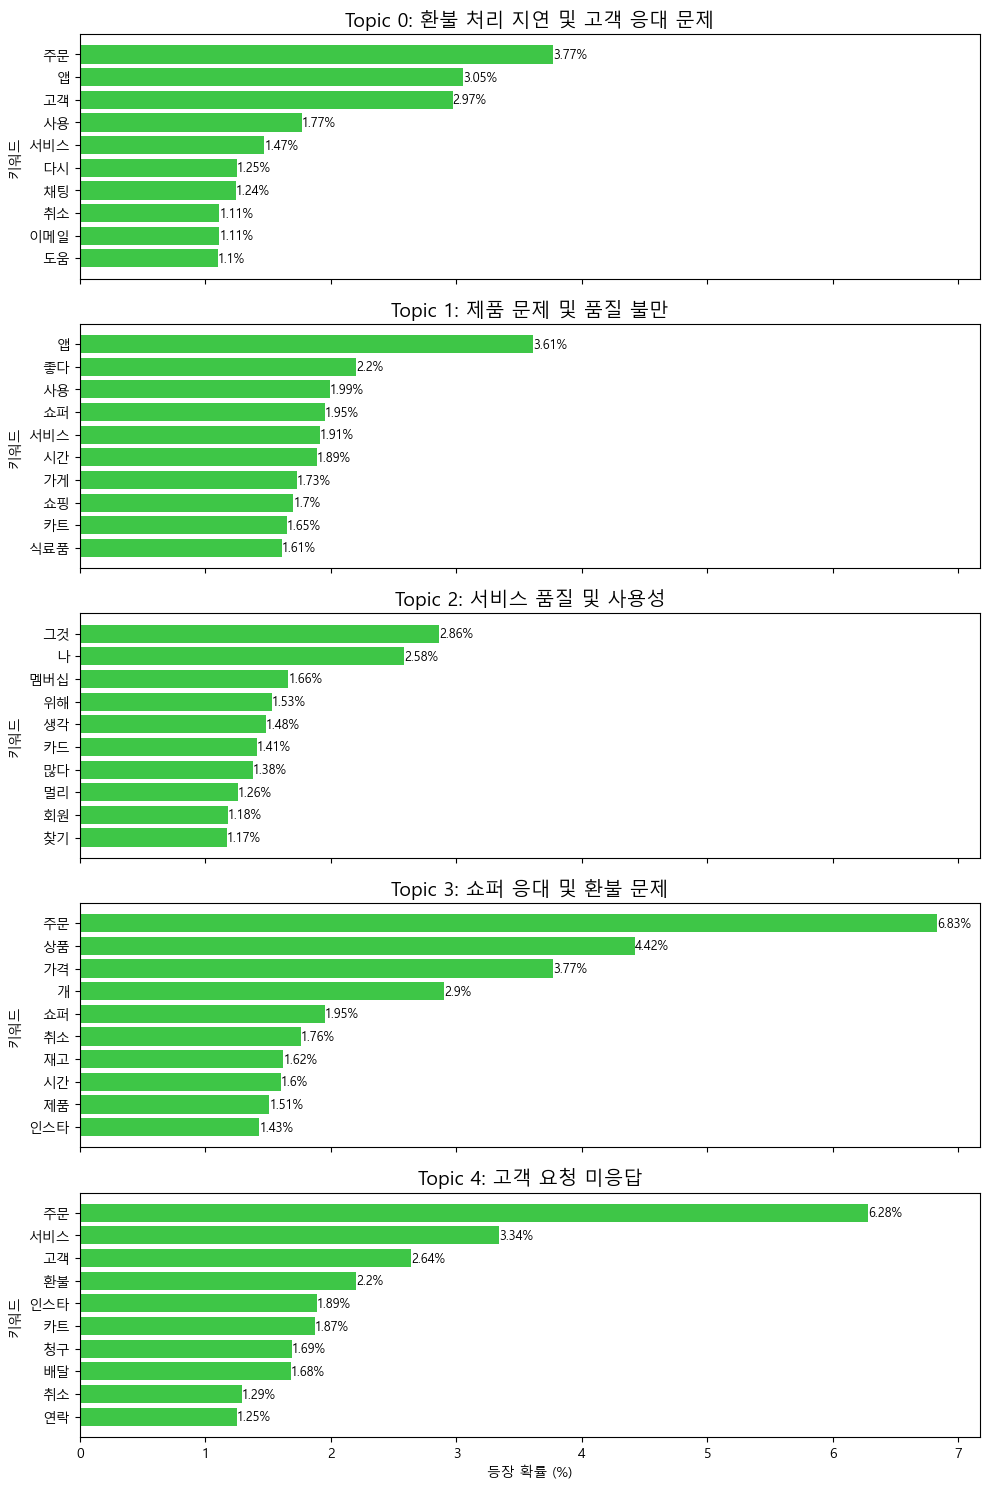

In [132]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Ìè∞Ìä∏ ÏÑ§Ï†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

lda_topic_labels = {
    0: "ÌôòÎ∂à Ï≤òÎ¶¨ ÏßÄÏó∞ Î∞è Í≥†Í∞ù ÏùëÎåÄ Î¨∏Ï†ú",
    1: "Ï†úÌíà Î¨∏Ï†ú Î∞è ÌíàÏßà Î∂àÎßå",
    2: "ÏÑúÎπÑÏä§ ÌíàÏßà Î∞è ÏÇ¨Ïö©ÏÑ±",
    3: "ÏáºÌçº ÏùëÎåÄ Î∞è ÌôòÎ∂à Î¨∏Ï†ú",
    4: "Í≥†Í∞ù ÏöîÏ≤≠ ÎØ∏ÏùëÎãµ"
}
clusters = df_keywords_bar['ÌÜ†ÌîΩ'].unique()
num_clusters = len(clusters)

fig, axes = plt.subplots(num_clusters, 1, figsize=(10, 3 * num_clusters), sharex=True)

if num_clusters == 1:
    axes = [axes]

for i, topic_id in enumerate(clusters):
    data = df_keywords_bar[df_keywords_bar['ÌÜ†ÌîΩ'] == topic_id]
    bars = axes[i].barh(data['ÌÇ§ÏõåÎìú'], data['Îì±Ïû• ÌôïÎ•†'], color="#3EC647")

    title = f"Topic {topic_id}: {lda_topic_labels.get(topic_id, f'Topic {topic_id}')}"
    axes[i].set_title(title, fontproperties=font_prop, fontsize=14)
    axes[i].set_ylabel("ÌÇ§ÏõåÎìú", fontproperties=font_prop)
    axes[i].invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        axes[i].text(width, bar.get_y() + bar.get_height() / 2,
                     f"{width}%", va='center', fontsize=9)

axes[-1].set_xlabel("Îì±Ïû• ÌôïÎ•† (%)", fontproperties=font_prop)
plt.tight_layout()
plt.show()


- Í∑∏Í≤É, ÎÇò , Í∞ú, Ïù¥Í≤ÉÎèÑ ÎπºÏïºÌï† Í≤É Í∞ôÏïÑÏöî

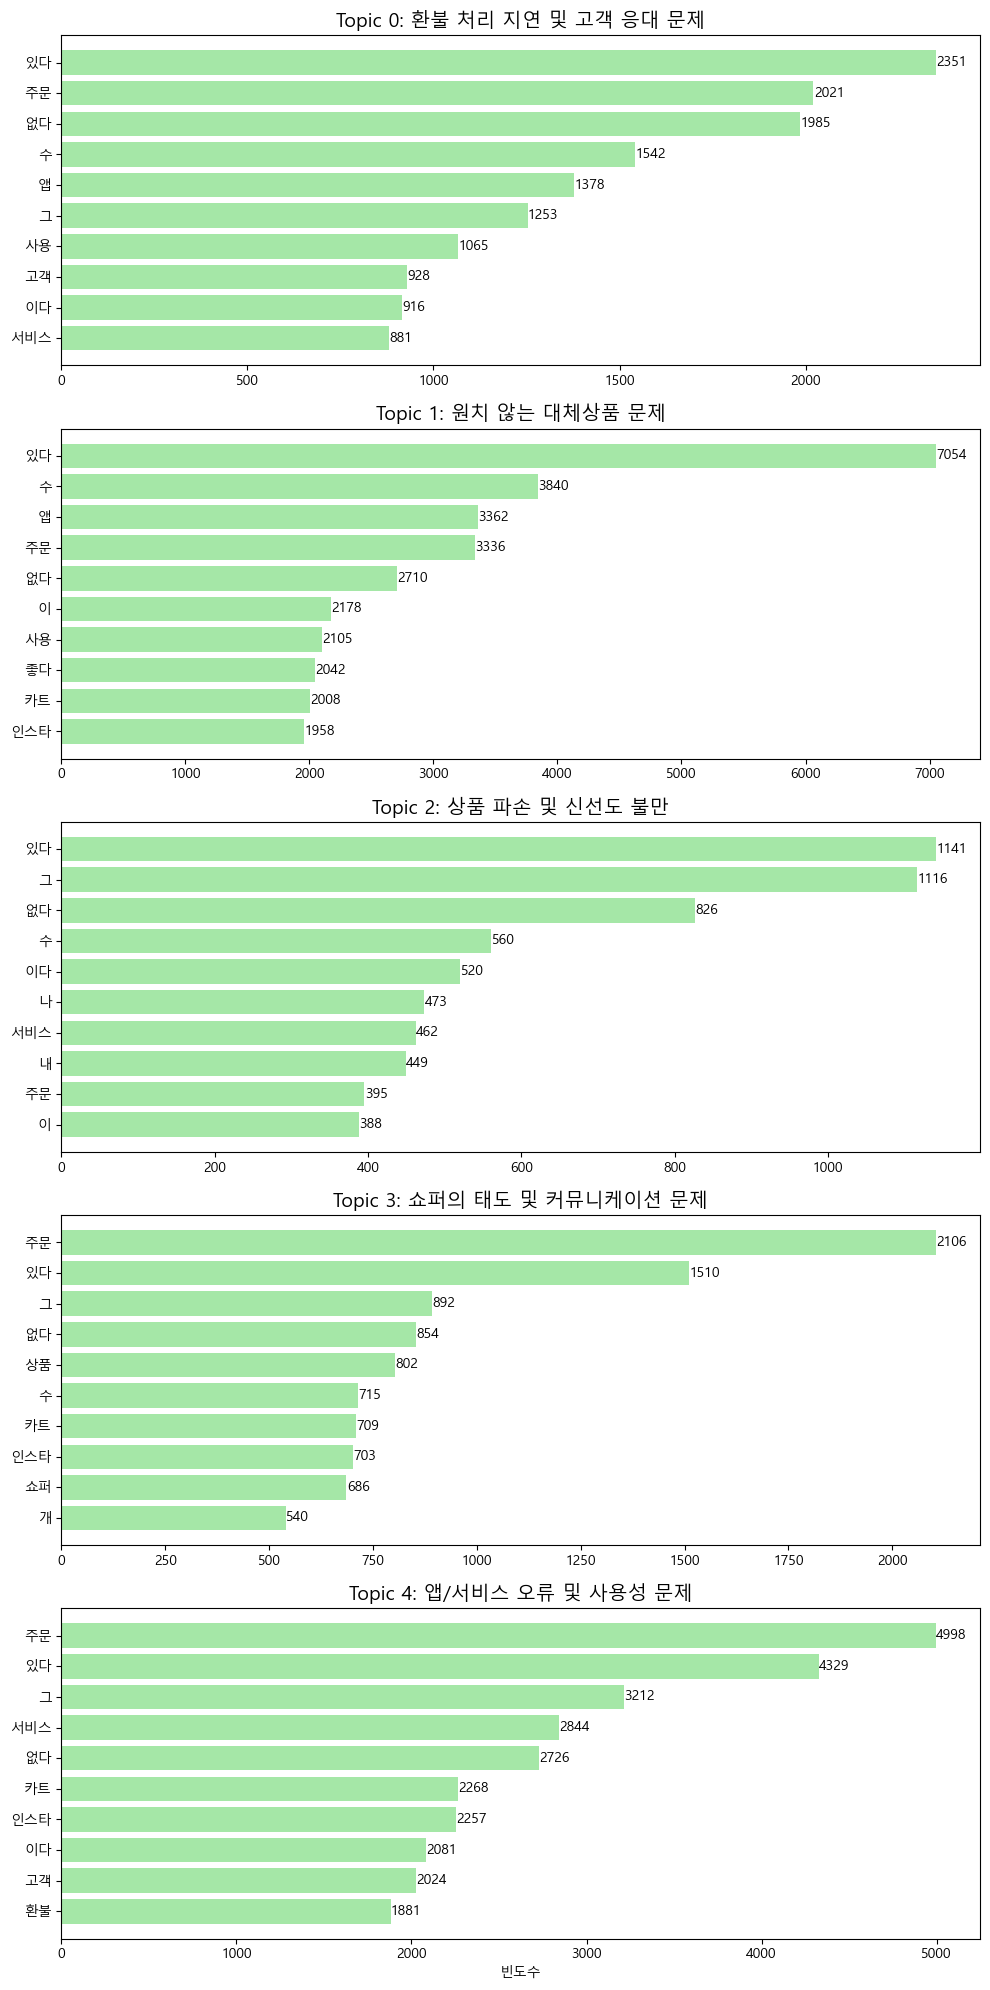

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter

# Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏúàÎèÑÏö∞ Í∏∞Ï§Ä)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# LDA ÌÜ†ÌîΩ ÎùºÎ≤® 
lda_topic_labels = {
    0: "ÌôòÎ∂à Ï≤òÎ¶¨ ÏßÄÏó∞ Î∞è Í≥†Í∞ù ÏùëÎåÄ Î¨∏Ï†ú",
    1: "Ï†úÌíà Î¨∏Ï†ú Î∞è ÌíàÏßà Î∂àÎßå",
    2: "ÏÑúÎπÑÏä§ ÌíàÏßà Î∞è ÏÇ¨Ïö©ÏÑ±",
    3: "ÏáºÌçº ÏùëÎåÄ Î∞è ÌôòÎ∂à Î¨∏Ï†ú",
    4: "Í≥†Í∞ù ÏöîÏ≤≠ ÎØ∏ÏùëÎãµ"
}
# ÌÜ†ÌîΩ Ïàò
topics = sorted(df_filtered['topic_cluster'].unique())
n_topics = len(topics)

# ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
fig, axes = plt.subplots(n_topics, 1, figsize=(10, 4 * n_topics), sharex=False)

# subplotÏù¥ 1Í∞úÏùº Í≤ΩÏö∞ Ï≤òÎ¶¨
if n_topics == 1:
    axes = [axes]

# Í∞Å ÌÜ†ÌîΩÎ≥ÑÎ°ú ÌÇ§ÏõåÎìú ÎπàÎèÑ Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
for i, topic in enumerate(topics):
    tokens_in_topic = df_filtered[df_filtered['topic_cluster'] == topic]['tokens_LDA']
    flat_tokens = [token for tokens in tokens_in_topic for token in tokens]
    counter = Counter(flat_tokens)
    top_keywords = counter.most_common(10)

    keywords, freqs = zip(*top_keywords)

    axes[i].barh(keywords, freqs, color="#A5E7A7")
    axes[i].set_title(f"Topic {topic}: {topic_label_map.get(topic)}", fontproperties=font_prop, fontsize=14)
    axes[i].invert_yaxis()  # ÎÜíÏùÄ ÎπàÎèÑÍ∞Ä ÏúÑÎ°ú Ïò§Í≤å

    for j, freq in enumerate(freqs):
        axes[i].text(freq + 1, j, str(freq), va='center', fontsize=10)

axes[-1].set_xlabel("ÎπàÎèÑÏàò", fontproperties=font_prop)
plt.tight_layout()
plt.show()


ÏûàÎã§, ÏóÜÎã§, Ïàò , Ïù¥, Ïù¥Îã§, Í∑∏ , ÌõÑ, <- Ïù¥Í≤å Î∂àÏö©Ïñ¥Ï≤òÎ¶¨Í∞Ä ÏûòÏïàÎêúÍ±∞Í∞ôÎÑ§,,, Îã§Ïãú ,,,
ÌïòÍ≥† ÏôîÎäîÎç∞ Ïù¥ ÎπàÎèÑÏàòÎäî ÏóÖÎç∞Ïù¥Ìä∏Í∞Ä Ïôú ÏïàÎêúÍ±∞ Í∞ôÏ£†,,,

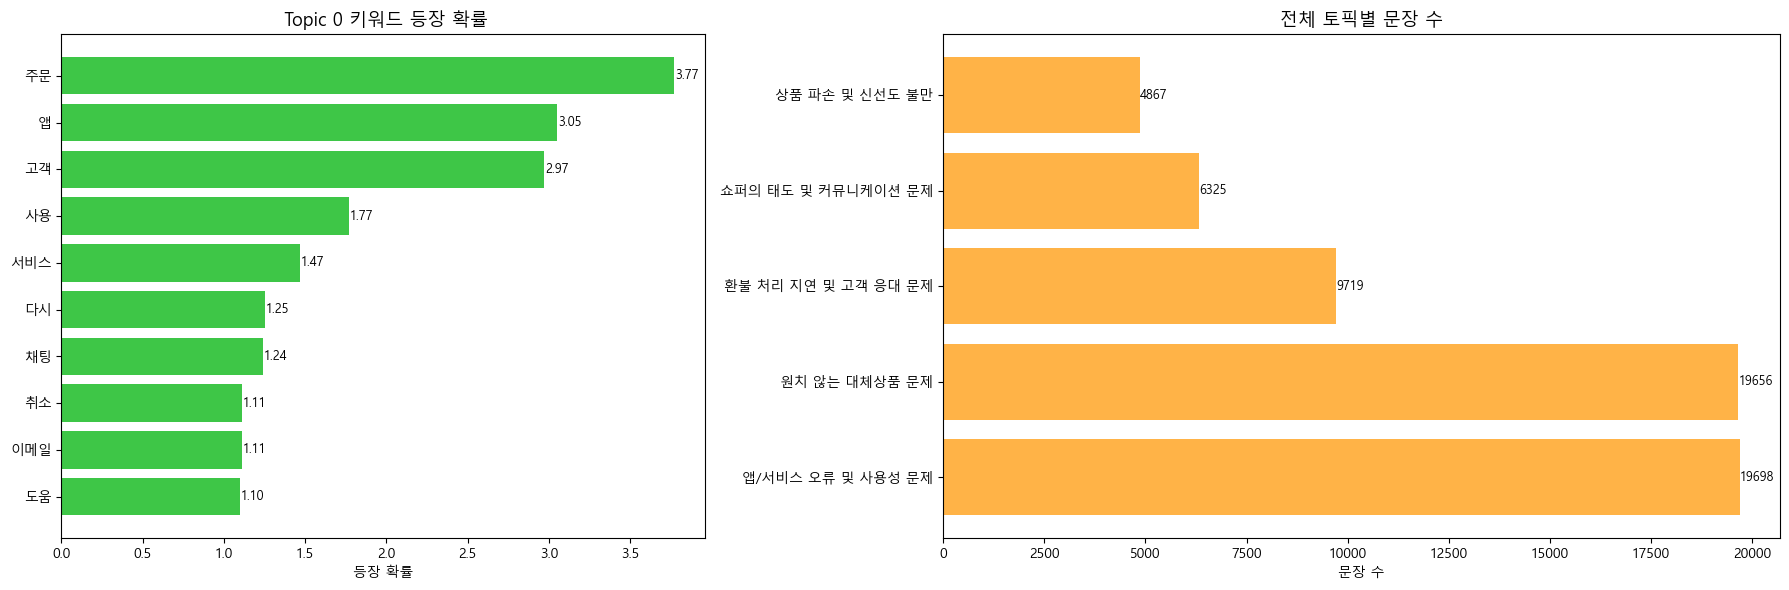

In [134]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Ìè∞Ìä∏ ÏÑ§Ï†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
plt.rcParams['font.family'] = 'Malgun Gothic'

# ÏÇ¨Ïö©Ìï† ÌÜ†ÌîΩ Î≤àÌò∏ ÏßÄÏ†ï
topic_id = 0

# ÌÜ†ÌîΩ ÎùºÎ≤® Îß§Ìïë
lda_topic_labels = {
    0: "ÌôòÎ∂à Ï≤òÎ¶¨ ÏßÄÏó∞ Î∞è Í≥†Í∞ù ÏùëÎåÄ Î¨∏Ï†ú",
    1: "Ï†úÌíà Î¨∏Ï†ú Î∞è ÌíàÏßà Î∂àÎßå",
    2: "ÏÑúÎπÑÏä§ ÌíàÏßà Î∞è ÏÇ¨Ïö©ÏÑ±",
    3: "ÏáºÌçº ÏùëÎåÄ Î∞è ÌôòÎ∂à Î¨∏Ï†ú",
    4: "Í≥†Í∞ù ÏöîÏ≤≠ ÎØ∏ÏùëÎãµ"
}

# ÏãúÍ∞ÅÌôî ÏãúÏûë
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), width_ratios=[1, 1.3])

# ÏôºÏ™Ω: ÌäπÏ†ï ÌÜ†ÌîΩÏùò ÌÇ§ÏõåÎìú Îì±Ïû• ÌôïÎ•†
keywords_data = df_keywords_bar[df_keywords_bar['ÌÜ†ÌîΩ'] == topic_id]
bars1 = ax1.barh(keywords_data['ÌÇ§ÏõåÎìú'], keywords_data['Îì±Ïû• ÌôïÎ•†'], color="#3EC647")
ax1.set_title(f" Topic {topic_id} ÌÇ§ÏõåÎìú Îì±Ïû• ÌôïÎ•†", fontsize=13)
ax1.invert_yaxis()
ax1.set_xlabel("Îì±Ïû• ÌôïÎ•†")

# ÏàòÏπò ÌëúÏãú
for bar in bars1:
    width = bar.get_width()
    ax1.text(width + 0.005, bar.get_y() + bar.get_height() / 2,
             f"{width:.2f}", va='center', fontsize=9)

# Ïò§Î•∏Ï™Ω: Ï†ÑÏ≤¥ ÌÜ†ÌîΩÎ≥Ñ Î¨∏Ïû• Ïàò
topic_counts = df_filtered['topic_cluster'].map(topic_label_map).value_counts().sort_values()
bars2 = ax2.barh(topic_counts.index, topic_counts.values, color="#FFB347")
ax2.set_title("Ï†ÑÏ≤¥ ÌÜ†ÌîΩÎ≥Ñ Î¨∏Ïû• Ïàò", fontsize=13)
ax2.set_xlabel("Î¨∏Ïû• Ïàò")
ax2.invert_yaxis()

# ÏàòÏπò ÌëúÏãú
for bar in bars2:
    count = int(bar.get_width())
    ax2.text(count + 1, bar.get_y() + bar.get_height() / 2,
             f"{count}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, ' Í∞Å ÌÜ†ÌîΩÎ≥Ñ Î¨∏Ïû• Ïàò')

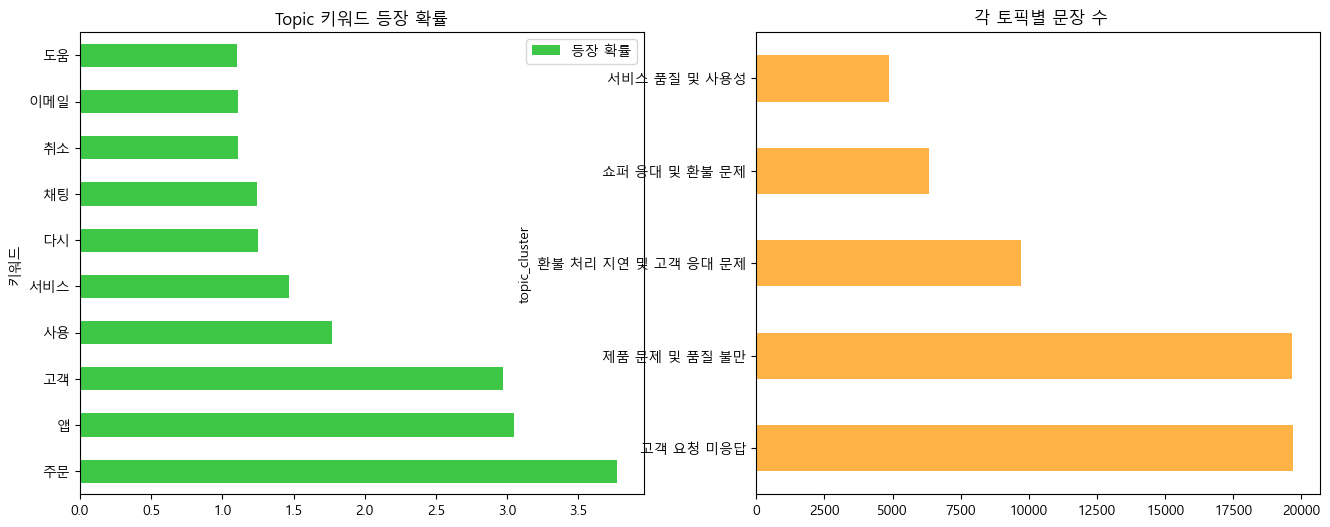

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ÏôºÏ™Ω: ÌÇ§ÏõåÎìú Îì±Ïû• ÌôïÎ•†
df_keywords_bar[df_keywords_bar['ÌÜ†ÌîΩ'] == 0].plot.barh(x='ÌÇ§ÏõåÎìú', y='Îì±Ïû• ÌôïÎ•†', ax=ax1, color="#3EC647")
ax1.set_title("Topic ÌÇ§ÏõåÎìú Îì±Ïû• ÌôïÎ•†")

# Ïò§Î•∏Ï™Ω: Î¨∏Ïû• Ïàò Ïπ¥Ïö¥Ìä∏
df_filtered['topic_cluster'].map(lda_topic_labels).value_counts().plot.barh(ax=ax2, color="#FFB347")
ax2.set_title(" Í∞Å ÌÜ†ÌîΩÎ≥Ñ Î¨∏Ïû• Ïàò") 

-> ÏõêÎûò Ïù¥Í≤å Í∏∞Ï°¥Ïù¥ÏòÄÎäîÎç∞ Ïù¥Î¶ÑÏù¥ Í∏∏Ïñ¥ÏÑú ÎÑòÏñ¥ÏôÄÏÑú Î∞îÎ°ú ÏúÑÏóê ÏΩîÎìúÎ°ú Î∞îÍøîÎ¥§Ïñ¥Ïöî

-------------tokens_cluster ÌôúÏö©------------------------------------

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# ÌÜ†ÌÅ∞ÏùÑ Í≥µÎ∞± Í∏∞Ï§Ä Î¨∏ÏûêÏó¥Î°ú Îã§Ïãú Ìï©Ïπ®
df_filtered['cluster_doc'] = df_filtered['tokens_cluster'].apply(lambda x: ' '.join(x))

# TF-IDF Î≤°ÌÑ∞Ìôî
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_filtered['cluster_doc'])

# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=5, random_state=42)
df_filtered['cluster'] = kmeans.fit_predict(X)


In [139]:
# 1. TF-IDF Î≤°ÌÑ∞Ìôî
df_filtered['cluster_doc'] = df_filtered['tokens_cluster'].apply(lambda x: ' '.join(x))

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(max_features=1000)
X_cluster = vectorizer.fit_transform(df_filtered['cluster_doc'])

# 2. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=5, random_state=42)
df_filtered['cluster'] = kmeans.fit_predict(X_cluster)


In [141]:
import numpy as np

terms = vectorizer.get_feature_names_out()

# ÌÅ¥Îü¨Ïä§ÌÑ∞ 4 Ï£ºÏöî ÌÇ§ÏõåÎìú
mean_tfidf_c4 = X_cluster[df_filtered['cluster'] == 4].mean(axis=0).A1
top_idx_c4 = np.argsort(mean_tfidf_c4)[::-1][:10]
cluster4_keywords = [terms[j] for j in top_idx_c4]

# ÌÜ†ÌîΩ 4 Ï£ºÏöî ÌÇ§ÏõåÎìú
from collections import Counter

tokens_topic4 = df_filtered[df_filtered['topic_cluster'] == 4]['tokens_LDA']
flat_tokens = [token for tokens in tokens_topic4 for token in tokens]
top_topic4_keywords = [word for word, _ in Counter(flat_tokens).most_common(10)]

# ÎåÄÌëú Î¨∏Ïû• Ï∂îÏ∂ú
topic4_sentences = df_filtered[df_filtered['topic_cluster'] == 4]['sentences'].drop_duplicates().head(3).tolist()
cluster4_sentences = df_filtered[df_filtered['cluster'] == 4]['sentences'].drop_duplicates().head(3).tolist()

# ÎπÑÍµê Ï∂úÎ†•
print("üí° LDA Topic 4 (Ïï±/ÏÑúÎπÑÏä§ Ïò§Î•ò Î∞è ÏÇ¨Ïö©ÏÑ± Î¨∏Ï†ú)")
print("<Ï£ºÏöî ÌÇ§ÏõåÎìú:>", top_topic4_keywords)
print("ÎåÄÌëú Î¨∏Ïû•:")
for s in topic4_sentences:
    print("-", s)

print("\nüí° TF-IDF Cluster 4")
print("< Ï£ºÏöî ÌÇ§ÏõåÎìú:>", cluster4_keywords)
print(" ÎåÄÌëú Î¨∏Ïû•:")
for s in cluster4_sentences:
    print("-", s)


üí° LDA Topic 4 (Ïï±/ÏÑúÎπÑÏä§ Ïò§Î•ò Î∞è ÏÇ¨Ïö©ÏÑ± Î¨∏Ï†ú)
<Ï£ºÏöî ÌÇ§ÏõåÎìú:> ['Ï£ºÎ¨∏', 'ÏûàÎã§', 'Í∑∏', 'ÏÑúÎπÑÏä§', 'ÏóÜÎã§', 'Ïπ¥Ìä∏', 'Ïù∏Ïä§ÌÉÄ', 'Ïù¥Îã§', 'Í≥†Í∞ù', 'ÌôòÎ∂à']
ÎåÄÌëú Î¨∏Ïû•:
- ÎÇ¥Í∞Ä Ï£ºÎ¨∏ÌïòÍ≥† Î∞∞Îã¨ÏùÑ ÏÇ¨Î¨¥Ïã§Î°ú Î∞õÏùÄ Îëê Î≤àÏùò Í≤ΩÌóò Î™®Îëê Î¨∏Ï†úÍ∞Ä ÏûàÏóàÏäµÎãàÎã§
- Ïñ¥Îñ§ Ïù¥Ïú†Î°ú Ïù∏Ìï¥ Ïï±Ïùò Îß§ÌïëÏù¥ Ïö¥Ï†ÑÏûêÎ•º ÏôÑÏ†ÑÌûà Îã§Î•∏ ÎèÑÏãúÎ°ú Î≥¥ÎÉàÏäµÎãàÎã§
- Ïö¥Ï†ÑÏûêÏóêÍ≤å Î©îÏãúÏßÄÎ•º Î≥¥ÎÇ¥ÏÑú GPSÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í±¥Î¨ºÏùÑ Ï∞æÎèÑÎ°ù ÏöîÏ≤≠ÌñàÏäµÎãàÎã§ (Ïã§Ï†ú ÏãúÏ≤≠ Í±¥Î¨º)

üí° TF-IDF Cluster 4
< Ï£ºÏöî ÌÇ§ÏõåÎìú:> ['Ï£ºÎ¨∏', 'ÏãúÍ∞Ñ', 'Î∞∞ÏÜ°', 'Ï∑®ÏÜå', 'ÏáºÌçº', 'Î∞∞Îã¨', 'Î¨ºÍ±¥', 'ÏßÄÎ∂à', 'ÏÑúÎπÑÏä§', 'ÎèÑÏ∞©']
 ÎåÄÌëú Î¨∏Ïû•:
- Îã§Î•∏ Ï£ºÏÜåÎ°ú Ï†ÑÌòÄ ÎÇ¥ ÏßëÏù¥ ÏïÑÎãå Í≥≥ÏúºÎ°ú Î∞∞Îã¨Îêú ÏãùÎ£åÌíàÏóê 200Îã¨Îü¨Î•º ÏçºÍ≥†, ÏáºÌçºÏôÄ ÎåÄÌôîÎ•º ÏãúÎèÑÌñàÍ≥†, Ïã§Ï†ú Ï£ºÏÜå/ÏßëÏúºÎ°ú Ï£ºÎ¨∏ÏùÑ Í∞ÄÏ†∏Îã§ Ï§Ñ Ïàò ÏûàÎã§Î©¥ Í∞ÄÏä§ÎπÑÏôÄ Ïù¥ÎèôÎπÑÎ•º Î≥¥ÏÉÅÌï¥Ï£ºÍ≤†Îã§Í≥† Ï†úÏïàÌñàÏßÄÎßå, ÏáºÌçºÎäî Î∞∞Îã¨ÎêòÏóàÎã§Í≥† ÌïòÍ≥† Ï£ºÎ¨∏ÏùÑ Í±∞Í∏∞

-> Ïù¥Î†áÍ≤å ÎπÑÍµêÌï¥ÏÑú Î≥¥ÎãàÍπå LDAÎ≥¥Îã§ TF-IDFÍ∞Ä Îçî ÌÇ§ÏõåÎìúÎ≥ÑÎ°úÎäî ÏûòÎêòÍ∏¥ÌñàÎäîÎç∞
- ÎãπÏó∞Ìï® LDAÎäî ÌòïÏö©ÏÇ¨Î•º ÏßëÏñ¥ÎÑ£ÏóàÍ≥† ClusterÏÇ¨Ïö©Ìï†Í±¥ Î™ÖÏÇ¨Îßå ÎÑ£ÏóàÏúºÎãàÍπå,,„Öé

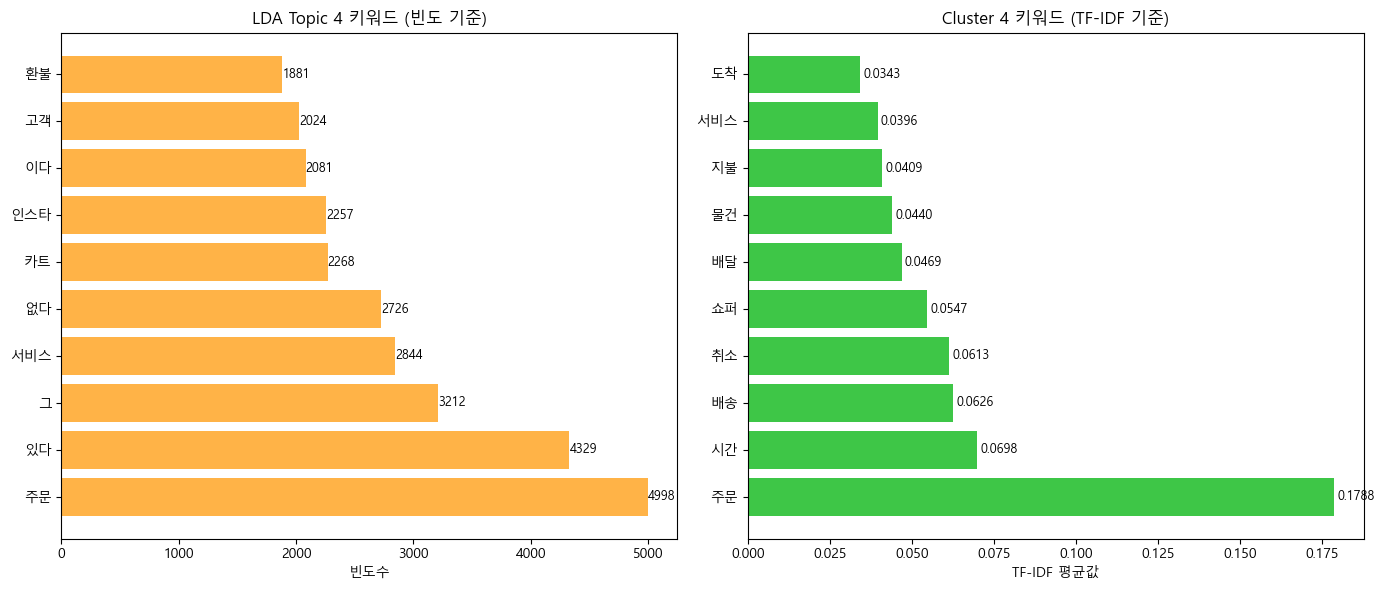

In [143]:
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'

# ÌÇ§ÏõåÎìú Îç∞Ïù¥ÌÑ∞
lda_keywords = Counter(flat_tokens).most_common(10)
lda_words, lda_freqs = zip(*lda_keywords)

cluster_freqs = mean_tfidf_c4[top_idx_c4]
cluster_words = cluster4_keywords

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# === LDA ÎßâÎåÄÍ∑∏ÎûòÌîÑ ===
bars_lda = axes[0].barh(lda_words[::-1], lda_freqs[::-1], color="#FFB347")
axes[0].set_title("LDA Topic 4 ÌÇ§ÏõåÎìú (ÎπàÎèÑ Í∏∞Ï§Ä)")
axes[0].set_xlabel("ÎπàÎèÑÏàò")
axes[0].invert_yaxis()

# LDA ÏàòÏπò ÌëúÏãú
for bar in bars_lda:
    width = bar.get_width()
    axes[0].text(width + 1, bar.get_y() + bar.get_height() / 2,
                 f"{int(width)}", va='center', fontsize=9)

# === Cluster ÎßâÎåÄÍ∑∏ÎûòÌîÑ ===
bars_cluster = axes[1].barh(cluster_words[::-1], cluster_freqs[::-1], color="#3EC647")
axes[1].set_title("Cluster 4 ÌÇ§ÏõåÎìú (TF-IDF Í∏∞Ï§Ä)")
axes[1].set_xlabel("TF-IDF ÌèâÍ∑†Í∞í")
axes[1].invert_yaxis()

# Cluster ÏàòÏπò ÌëúÏãú
for bar in bars_cluster:
    width = bar.get_width()
    axes[1].text(width + 0.001, bar.get_y() + bar.get_height() / 2,
                 f"{width:.4f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


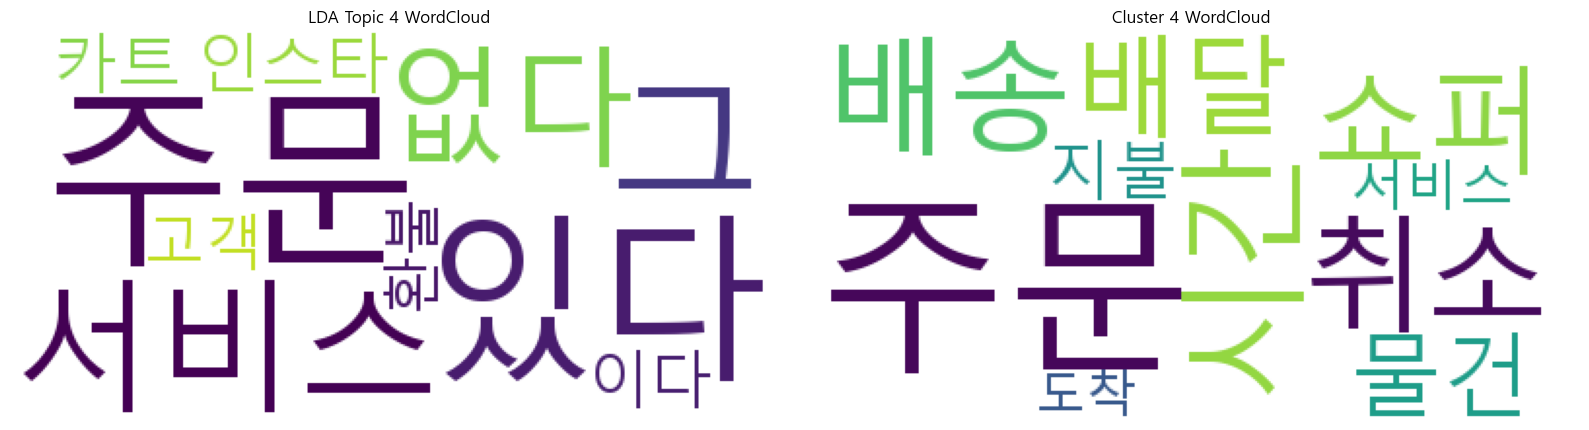

In [145]:
from wordcloud import WordCloud

# LDA WordCloud
lda_wordcloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", background_color="white").generate_from_frequencies(dict(lda_keywords))

# Cluster WordCloud
cluster_word_freq = {terms[i]: mean_tfidf_c4[i] for i in top_idx_c4}
cluster_wordcloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", background_color="white").generate_from_frequencies(cluster_word_freq)

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].imshow(lda_wordcloud)
axes[0].axis("off")
axes[0].set_title("LDA Topic 4 WordCloud")

axes[1].imshow(cluster_wordcloud)
axes[1].axis("off")
axes[1].set_title("Cluster 4 WordCloud")

plt.tight_layout()
plt.show()


-> ÌÜ†ÌîΩ 4Î°ú ÌïúÎ≤à ÎπÑÍµêÌï¥Î≥ºÎ†§Í≥† ÌïúÍ±∞ÏóêÏöî ! (ÏúÑÏóêÎèÑ ÎßàÏ∞¨Í∞ÄÏßÄ)
-> Ïù¥Î†áÍ≤å ÎπÑÍµêÌï¥ÏÑú Î≥¥ÎãàÍπå LDAÎ≥¥Îã§ TF-IDFÍ∞Ä Îçî ÌÇ§ÏõåÎìúÎ≥ÑÎ°úÎäî ÏûòÎêòÍ∏¥ÌñàÎäîÎç∞
- ÎãπÏó∞Ìï® LDAÎäî ÌòïÏö©ÏÇ¨Î•º ÏßëÏñ¥ÎÑ£ÏóàÍ≥† ClusterÏÇ¨Ïö©Ìï†Í±¥ Î™ÖÏÇ¨Îßå ÎÑ£ÏóàÏúºÎãàÍπå,,„Öé
- Ïù¥Î†áÍ≤å ÎßêÌïúÍ≤É Ï≤òÎüº Ïù¥Í±∏ ÎπÑÍµêÌï¥ÏÑú ÌôïÏù∏Ìïú Ïù¥ÏÉÅ,,, Ï°∞Í∏à Îçî ÎîîÎ≤®Î°≠ÏùÑ ,,,,

In [148]:
# ÌÜ†ÌîΩÎ≥ÑÎ°ú Î¶¨Î∑∞ ÌÖçÏä§Ìä∏ Ìï©Ïπ†Í±∞ÏûÑ
df_filtered['lda_doc'] = df_filtered['tokens_LDA'].apply(lambda x: ' '.join(x))

In [149]:
# ÏÉÅÏúÑ ÌÇ§ÏõåÎìú Ï∂îÏ∂úÌï†Í±∞ÏûÑ 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# TF-IDF Î≤°ÌÑ∞Ìôî Ï†ÑÏ≤¥ ÏàòÌñâ
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df_filtered['lda_doc'])
terms = vectorizer.get_feature_names_out()

# Í≤∞Í≥º Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
topic_tfidf_keywords = {}

# Í∞Å ÌÜ†ÌîΩÎ≥Ñ ÏÉÅÏúÑ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
for topic_id in sorted(df_filtered['topic_cluster'].unique()):
    # Ìï¥Îãπ ÌÜ†ÌîΩÏóê ÏÜçÌïú Î¨∏ÏÑú Ïù∏Îç±Ïä§
    idx = df_filtered['topic_cluster'] == topic_id
    X_topic = X_tfidf[idx]

    # ÌèâÍ∑† Î≤°ÌÑ∞ ‚Üí ÏÉÅÏúÑ TF-IDF ÌÇ§ÏõåÎìú
    mean_tfidf = X_topic.mean(axis=0).A1
    top_idx = mean_tfidf.argsort()[::-1][:10]
    keywords = [terms[i] for i in top_idx]

    topic_tfidf_keywords[topic_id] = keywords


In [150]:
for topic_id, keywords in topic_tfidf_keywords.items():
    print(f" Topic {topic_id} Ï£ºÏöî ÌÇ§ÏõåÎìú (TF-IDF Í∏∞Î∞ò ÏöîÏïΩ):")
    print("   " + ", ".join(keywords))


 Topic 0 Ï£ºÏöî ÌÇ§ÏõåÎìú (TF-IDF Í∏∞Î∞ò ÏöîÏïΩ):
   ÏóÜÎã§, Ï£ºÎ¨∏, ÏûàÎã§, ÏÇ¨Ïö©, Ïù¥Îã§, Í≥†Í∞ù, ÏÑúÎπÑÏä§, Îã§Ïãú, Î¨∏Ï†ú, Ïù¥Î©îÏùº
 Topic 1 Ï£ºÏöî ÌÇ§ÏõåÎìú (TF-IDF Í∏∞Î∞ò ÏöîÏïΩ):
   ÏûàÎã§, Ï¢ãÎã§, Ï£ºÎ¨∏, ÏÇ¨Ïö©, ÏóÜÎã§, Ïπ¥Ìä∏, Ïù∏Ïä§ÌÉÄ, ÏáºÌçº, Ïù¥Îã§, ÏÑúÎπÑÏä§
 Topic 2 Ï£ºÏöî ÌÇ§ÏõåÎìú (TF-IDF Í∏∞Î∞ò ÏöîÏïΩ):
   ÏûàÎã§, ÏóÜÎã§, Ïù¥Îã§, Í∑∏Í≤É, ÏÑúÎπÑÏä§, Í≥†Í∞ù, Ïπ¥Ìä∏, Ïù∏Ïä§ÌÉÄ, Î©§Î≤ÑÏã≠, Í∞ÄÏûÖ
 Topic 3 Ï£ºÏöî ÌÇ§ÏõåÎìú (TF-IDF Í∏∞Î∞ò ÏöîÏïΩ):
   Ï£ºÎ¨∏, ÏûàÎã§, ÏÉÅÌíà, ÏáºÌçº, ÏóÜÎã§, Ïù∏Ïä§ÌÉÄ, Ïπ¥Ìä∏, ÏÑ†ÌÉù, ÏãúÏûë, ÏÇ¨Ïö©
 Topic 4 Ï£ºÏöî ÌÇ§ÏõåÎìú (TF-IDF Í∏∞Î∞ò ÏöîÏïΩ):
   Ï£ºÎ¨∏, ÏûàÎã§, ÏÑúÎπÑÏä§, ÏóÜÎã§, Ïù¥Îã§, Í≥†Í∞ù, Ïπ¥Ìä∏, Ïù∏Ïä§ÌÉÄ, ÌôòÎ∂à, Ï≤≠Íµ¨


-> Ïù¥Î†áÍ≤å Î≥¥ÎãàÍπå Îòê,,, LDAÍ∞Ä ÎÇòÏùÄÍ±∞ Í∞ôÍ∏∞ÎèÑÌïòÍ≥†,,,, 

In [152]:
df_filtered.head(2)

rating                                             review  \
0       1  The two times I have ordered and had my delive...   
0       1  The two times I have ordered and had my delive...   

                                                  Î¶¨Î∑∞  \
0  ÎÇ¥Í∞Ä Ï£ºÎ¨∏ÌïòÍ≥† Î∞∞Îã¨ÏùÑ ÏÇ¨Î¨¥Ïã§Î°ú Î∞õÏùÄ Îëê Î≤àÏùò Í≤ΩÌóò Î™®Îëê Î¨∏Ï†úÍ∞Ä ÏûàÏóàÏäµÎãàÎã§. Ïñ¥Îñ§ Ïù¥...   
0  ÎÇ¥Í∞Ä Ï£ºÎ¨∏ÌïòÍ≥† Î∞∞Îã¨ÏùÑ ÏÇ¨Î¨¥Ïã§Î°ú Î∞õÏùÄ Îëê Î≤àÏùò Í≤ΩÌóò Î™®Îëê Î¨∏Ï†úÍ∞Ä ÏûàÏóàÏäµÎãàÎã§. Ïñ¥Îñ§ Ïù¥...   

                                  sentences  \
0  ÎÇ¥Í∞Ä Ï£ºÎ¨∏ÌïòÍ≥† Î∞∞Îã¨ÏùÑ ÏÇ¨Î¨¥Ïã§Î°ú Î∞õÏùÄ Îëê Î≤àÏùò Í≤ΩÌóò Î™®Îëê Î¨∏Ï†úÍ∞Ä ÏûàÏóàÏäµÎãàÎã§   
0    Ïñ¥Îñ§ Ïù¥Ïú†Î°ú Ïù∏Ìï¥ Ïï±Ïùò Îß§ÌïëÏù¥ Ïö¥Ï†ÑÏûêÎ•º ÏôÑÏ†ÑÌûà Îã§Î•∏ ÎèÑÏãúÎ°ú Î≥¥ÎÉàÏäµÎãàÎã§   

                                     tokens  \
0   [ÎÇ¥, Ï£ºÎ¨∏, Î∞∞Îã¨, ÏÇ¨Î¨¥Ïã§, Îëê, Î≤àÏùò, Í≤ΩÌóò, Î™®Îëê, Î¨∏Ï†ú, ÏûàÎã§]   
0  [Ïñ¥ÎñªÎã§, Ïù¥Ïú†, Ïù∏ÌïòÎã§, Ïï±, Îß§Ìïë, Ïö¥Ï†ÑÏûê, ÏôÑÏ†ÑÌïòÎã§, Îã§Î•∏, ÎèÑÏãú]   

                                 tokens_LDA  \
0   [ÎÇ¥, Ï£ºÎ¨∏, Î∞∞Îã¨, ÏÇ¨Î¨¥Ïã§, Îëê, Î≤àÏùò, Í≤ΩÌóò, Î™®Îëê, Î¨∏Ï†ú, ÏûàÎã§]   
0  [Ïñ¥ÎñªÎã§, Ïù¥Ïú†, Ïù∏ÌïòÎã§, Ïï±, Îß§Ìïë, Ïö¥Ï†ÑÏûê, ÏôÑÏ†ÑÌïòÎã§, Îã§Î•∏, ÎèÑÏãú]   

                                      tokens_cluster impact_category  \
0  [Ï£ºÎ¨∏, Î∞∞Îã¨, ÏÇ¨Î¨¥Ïã§, Î≤àÏùò, Í≤ΩÌóò, Î™®Îëê, Î¨∏Ï†ú, Ïù¥Ïú†, Îß§Ìïë, Ïö¥Ï†ÑÏûê, Îã§Î•∏,...           Î∞∞ÏÜ° Î¨∏Ï†ú   
0  [Ï£ºÎ¨∏, Î∞∞Îã¨, ÏÇ¨Î¨¥Ïã§, Î≤àÏùò, Í≤ΩÌóò, Î™®Îëê, Î¨∏Ï†ú, Ïù¥Ïú†, Îß§Ìïë, Ïö¥Ï†ÑÏûê, Îã§Î•∏,...          ÎåÄÏ≤¥Ìíà Î¨∏Ï†ú   

   topic_cluster                                         tokens_lda  \
0              4  [Ï£ºÎ¨∏, Î∞∞Îã¨, ÏÇ¨Î¨¥Ïã§, Îëê, Î≤àÏùò, Í≤ΩÌóò, Î™®Îëê, Î¨∏Ï†ú, Ïñ¥ÎñªÎã§, Ïù¥Ïú†, Ïù∏ÌïòÎã§,...   
0              4  [Ï£ºÎ¨∏, Î∞∞Îã¨, ÏÇ¨Î¨¥Ïã§, Îëê, Î≤àÏùò, Í≤ΩÌóò, Î™®Îëê, Î¨∏Ï†ú, Ïñ¥ÎñªÎã§, Ïù¥Ïú†, Ïù∏ÌïòÎã§,...   

         topic_label                                        cluster_doc  \
0  Ïï±/ÏÑúÎπÑÏä§ Ïò§Î•ò Î∞è ÏÇ¨Ïö©ÏÑ± Î¨∏Ï†ú  Ï£ºÎ¨∏ Î∞∞Îã¨ ÏÇ¨Î¨¥Ïã§ Î≤àÏùò Í≤ΩÌóò Î™®Îëê Î¨∏Ï†ú Ïù¥Ïú† Îß§Ìïë Ïö¥Ï†ÑÏûê Îã§Î•∏ ÎèÑÏãú Ïö¥Ï†ÑÏûê Î©îÏãúÏßÄ ...   
0  Ïï±/ÏÑúÎπÑÏä§ Ïò§Î•ò Î∞è ÏÇ¨Ïö©ÏÑ± Î¨∏Ï†ú  Ï£ºÎ¨∏ Î∞∞Îã¨ ÏÇ¨Î¨¥Ïã§ Î≤àÏùò Í≤ΩÌóò Î™®Îëê Î¨∏Ï†ú Ïù¥Ïú† Îß§Ìïë Ïö¥Ï†ÑÏûê Îã§Î•∏ ÎèÑÏãú Ïö¥Ï†ÑÏûê Î©îÏãúÏßÄ ...   

   cluster                         lda_doc  
0        1    ÎÇ¥ Ï£ºÎ¨∏ Î∞∞Îã¨ ÏÇ¨Î¨¥Ïã§ Îëê Î≤àÏùò Í≤ΩÌóò Î™®Îëê Î¨∏Ï†ú ÏûàÎã§  
0        1  Ïñ¥ÎñªÎã§ Ïù¥Ïú† Ïù∏ÌïòÎã§ Ïï± Îß§Ìïë Ïö¥Ï†ÑÏûê ÏôÑÏ†ÑÌïòÎã§ Îã§Î•∏ ÎèÑÏãú

In [153]:
# review Ïª¨Îüº Ï†úÍ±∞
df_save = df_filtered.drop(columns=['review'])

# Ï†ÄÏû•
df_save.to_csv("LDA_Cluster_ÏµúÏ¢ÖÏ†ïÎ¶¨_0625.csv", encoding="utf-8-sig", index=False)
